# CUSTOMER SEGMENTATION

This is an unsupervised clustering of data on the customer's records from a groceries firm's database obtained in Kaggle.

The main objective that I aim to achieve is to divide the customers into different groups in order to optimize the marketing campaing of this firm.

Consequently, in this work I will focus on:

* the interpretation of the data, in order to find the largest number of insights of the data given
* the clustering, trying to find the best model that segment the clients in the best way

# Import the libraries

In [1]:
#Data treatment
import pandas as pd
from pandas import DataFrame
import numpy as np
import datetime
np.random.seed(42)

#Warnings configuration
import warnings
warnings.filterwarnings('ignore')

#Pandas profiling
import pandas_profiling as ppf
from pandas_profiling import ProfileReport

#Graphs
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from seaborn import distplot
from matplotlib.ticker import FormatStrFormatter
sns.set()
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

#Preprocessing
from sklearn import metrics
import sklearn
from scipy.stats import skew
from scipy.stats import kurtosis
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler

#Modeling
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

# 1. Data overview

In [2]:
df=pd.read_csv("marketing_campaign.csv", sep="\t")

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
#Size
print('The dataset has ' + str(df.shape[0]) + ' rows and ' + str(df.shape[1]) + ' columns.')

The dataset has 2240 rows and 29 columns.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

This is are the features we have:
* Customer representation:
 'ID', \
 'Year_Birth', \
 'Education', \
 'Marital_Status', \
 'Income' (yearly household income), \
 'Kidhome' (Number of children in customer's household), \
 'Teenhome' (Number of teenagers in customer's household), \
 'Dt_Customer' (Date of customer's enrollment with the company), \
 'Recency' (Number of days since customer's last purchase),\
 'Complain' (1 if the customer complained in the last 2 years, 0 otherwise)
       
* Products they buy (amount spent in the last 2 years):\
'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'

* Purchaces they made:\
 'NumWebPurchases' (Number of purchases made through the company’s website),\
 'NumCatalogPurchases' (Number of purchases made using a catalogue), \
 'NumStorePurchases', \
 'NumWebVisitsMonth'

* Promotions:\
 'NumDealsPurchases' (Number of purchases made with a discount), \
 'AcceptedCmp3' (1 if customer accepted the offer in the 1st campaign, 0 otherwise), \
 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', \
 'Response' (1 if customer accepted the offer in the last campaign, 0 otherwise)

* Ohers:\
 'Z_CostContact', \
 'Z_Revenue' 

In [6]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [7]:
#Check if there are missing values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

There are missing values in just one feature: income. All others are completed.

In [8]:
#Check how many unique values there are
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

* ID can be droped
* Z_CostContact has one possible value, so it can be droped
* The same with Z_Revenue

In [9]:
#Check for duplicate data
df[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [10]:
stats_df=df.describe(include='all')
stats_df.loc['Max-Min']=stats_df.loc['max']-stats_df.loc['min']
out_fields=['mean','25%','50%','75%','Max-Min']
stats_de=stats_df.loc[out_fields]
stats_df.rename({'50%':'median'},inplace=True)
stats_df.round(0).T

,count,unique,top,freq,mean,std,min,25%,median,75%,max,Max-Min
ID,2240.0,NaN,NaN,NaN,5592.0,3247.0,0.0,2828.0,5458.0,8428.0,11191.0,11191.0
Year_Birth,2240.0,NaN,NaN,NaN,1969.0,12.0,1893.0,1959.0,1970.0,1977.0,1996.0,103.0
Education,2240,5,Graduation,1127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,2240,8,Married,864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,2216.0,NaN,NaN,NaN,52247.0,25173.0,1730.0,35303.0,51382.0,68522.0,666666.0,664936.0
Kidhome,2240.0,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,1.0,2.0,2.0
Teenhome,2240.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,2.0,2.0
Dt_Customer,2240,663,31-08-2012,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recency,2240.0,NaN,NaN,NaN,49.0,29.0,0.0,24.0,49.0,74.0,99.0,99.0
MntWines,2240.0,NaN,NaN,NaN,304.0,337.0,0.0,24.0,174.0,504.0,1493.0,1493.0


# 2. EDA

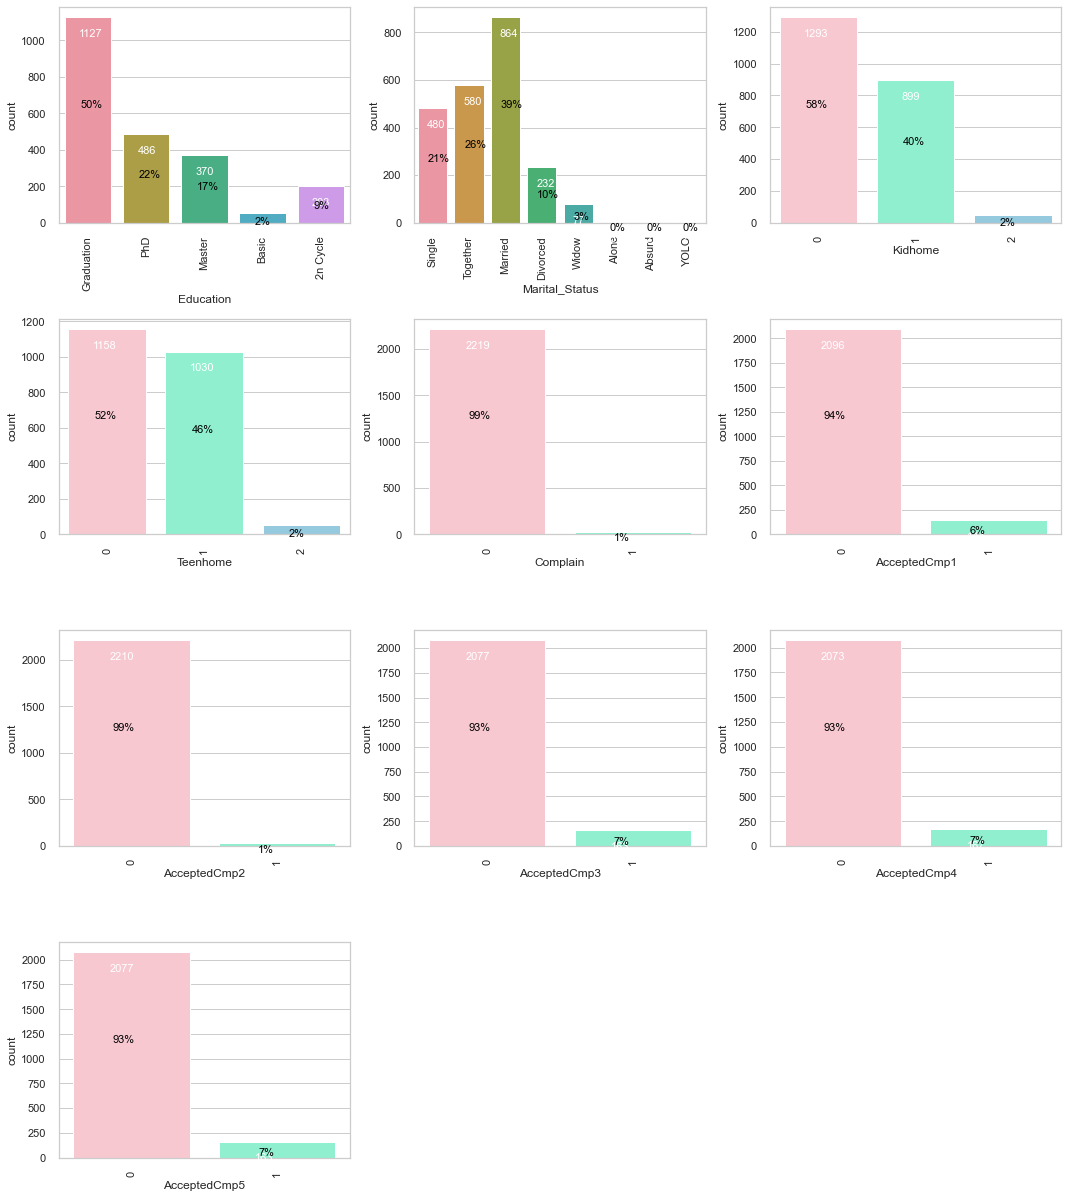

In [11]:
var=['Education', 'Marital_Status','Kidhome','Teenhome',
     'Complain','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']
columns=df[var].columns.tolist()

plt.figure(figsize=(15,25))
sns.set_theme(style="whitegrid")
sns.set_palette(["pink", "aquamarine","skyblue","lightyellow"])

for i,var in enumerate(columns):
    plt.subplot(6, 3, i + 1)
    order=df[var].value_counts(ascending=False).index
    ax=sns.countplot(df[var])
    
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.25, p.get_height()), va='top', color='white', size=11)
        percentage = '{:.0f}%'.format(100 * p.get_height()/len(df[var]))
        x = p.get_x()+0.27
        y = p.get_height()*0.6
        plt.annotate(percentage, (x, y),va='top', color='black', size=11)
        plt.xticks(rotation = 90)
    
    plt.tight_layout()
    
plt.show()

In [12]:
#Define a function for the graphs that I am going to use later
def combined_graph (data, 
                    feature, 
                    figsize=(12, 8), 
                    kde=False, bins=None):
    
    sns.set_theme(style="whitegrid")
    fig,(ax_box, ax_hist, ax_hist2)=plt.subplots(nrows=3,
                                                 sharex=True,
                                                 figsize=figsize)
    sns.boxplot(data=data, 
                x=feature, 
                ax=ax_box, 
                showmeans=True, 
                color="pink",
                linewidth=1)
    
    sns.histplot(data=data, 
                 x=feature, 
                 kde=True, 
                 ax=ax_hist, 
                 color='deepskyblue', 
                 bins=60)
    
    sns.histplot(data=data, 
                 x=feature, 
                 ax=ax_hist2, 
                 color='aquamarine', 
                 bins=50, 
                 cumulative=True, 
                 stat='probability')

Feature: Year_Birth

Brief statistical description:

count    2240.0
mean     1968.8
std        12.0
min      1893.0
25%      1959.0
50%      1970.0
75%      1977.0
max      1996.0
Name: Year_Birth, dtype: float64

Looking for outliers:

The q25, q50, q75 quartiles for the feature Year_Birth are: 1959.0 1970.0 1977.0
Having iqr defined as: q75-q25, for the feature Year_Birth the iqr is: 18.0

In this way,
 - the lower limit (q25 minus 1.5 of the iqr) is: 1932.0 and 
 - the upper limit (q75 pusl 1.5 of the iqr) is: 2004.0

Counting outliers below the minimun:
1900    1
1893    1
1899    1
dtype: int64

Counting outliers above the maximun:
Series([], dtype: int64)

Graphs:


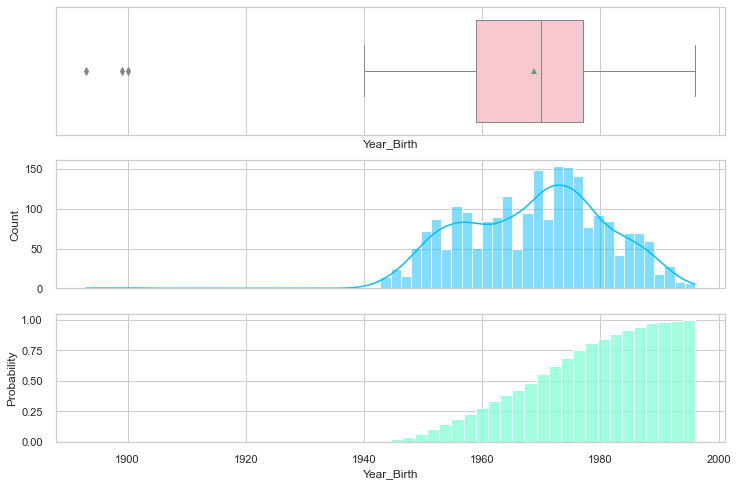

Skew: -0.349709478173819
Kurtosis (excess kurtosis): 0.71318658376528


In [13]:
#Feature to analize
feature='Year_Birth'

print("Feature:",feature)
describe=df[feature].describe().round(1)
print("\nBrief statistical description:\n")
print(describe)


#Looking for outliers
print("\nLooking for outliers:")
q25, q50, q75 = np.percentile(df[feature], [25,50,75])
print("\nThe q25, q50, q75 quartiles for the feature",feature,"are:", q25, q50, q75)
iqr=q75-q25
print("Having iqr defined as: q75-q25, for the feature",feature,"the iqr is:",iqr)

#I calculate the minimum and maximum limits from which a value is considered an outlier
min=q25-1.5*(iqr)
max=q75+1.5*(iqr)
print("\nIn this way,\n - the lower limit (q25 minus 1.5 of the iqr) is:",min,"and","\n - the upper limit (q75 pusl 1.5 of the iqr) is:", max)

#Identify these points
#print("\nRecords above the defined maximum are:",[x for x in df[feature] if x > max])
#print("Records below the defined minimum are:",[m for m in df[feature] if m < min])

#Counting them
count_min=[m for m in df[feature] if m < min]
count_min=pd.Series(count_min)
print("\nCounting outliers below the minimun:")
print(count_min.value_counts())

#Counting them
count_max=[m for m in df[feature] if m > max]
count_max=pd.Series(count_max)
print("\nCounting outliers above the maximun:")
print(count_max.value_counts())

#Graphs
print("\nGraphs:")
combined_graph(df,feature)
plt.show()

#Skewness and kurotsis
print("Skew:",skew(df[feature]))
print("Kurtosis (excess kurtosis):",kurtosis(df[feature]))

In [14]:
df['Year_Birth'].value_counts()

1976    89
1971    87
1975    83
1972    79
1970    77
1978    77
1973    74
1965    74
1969    71
1974    69
1956    55
1979    53
1958    53
1977    52
1952    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1963    45
1982    45
1967    44
1962    44
1951    43
1957    43
1986    42
1983    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1949    30
1989    30
1988    29
1950    29
1987    27
1948    21
1990    18
1947    16
1946    16
1991    15
1992    13
1945     8
1943     7
1944     7
1995     5
1993     5
1994     3
1996     2
1900     1
1941     1
1899     1
1940     1
1893     1
Name: Year_Birth, dtype: int64

Feature: Income

Brief statistical description:

count      2216.0
mean      52247.3
std       25173.1
min        1730.0
25%       35303.0
50%       51381.5
75%       68522.0
max      666666.0
Name: Income, dtype: float64

Looking for outliers:

The q25, q50, q75 quartiles for the feature Income are: nan nan nan
Having iqr defined as: q75-q25, for the feature Income the iqr is: nan

In this way,
 - the lower limit (q25 minus 1.5 of the iqr) is: nan and 
 - the upper limit (q75 pusl 1.5 of the iqr) is: nan

Counting outliers below the minimun:
Series([], dtype: int64)

Counting outliers above the maximun:
Series([], dtype: int64)

Graphs:


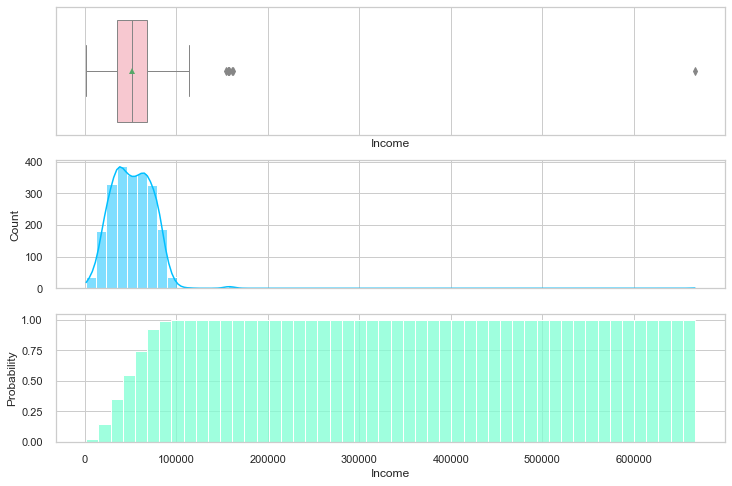

Skew: nan
Kurtosis (excess kurtosis): nan


In [15]:
#Feature to analize
feature='Income'

print("Feature:",feature)
describe=df[feature].describe().round(1)
print("\nBrief statistical description:\n")
print(describe)


#Looking for outliers
print("\nLooking for outliers:")
q25, q50, q75 = np.percentile(df[feature], [25,50,75])
print("\nThe q25, q50, q75 quartiles for the feature",feature,"are:", q25, q50, q75)
iqr=q75-q25
print("Having iqr defined as: q75-q25, for the feature",feature,"the iqr is:",iqr)

#I calculate the minimum and maximum limits from which a value is considered an outlier
min=q25-1.5*(iqr)
max=q75+1.5*(iqr)
print("\nIn this way,\n - the lower limit (q25 minus 1.5 of the iqr) is:",min,"and","\n - the upper limit (q75 pusl 1.5 of the iqr) is:", max)

#Identify these points
#print("\nRecords above the defined maximum are:",[x for x in df[feature] if x > max])
#print("Records below the defined minimum are:",[m for m in df[feature] if m < min])

#Counting them
count_min=[m for m in df[feature] if m < min]
count_min=pd.Series(count_min)
print("\nCounting outliers below the minimun:")
print(count_min.value_counts())

#Counting them
count_max=[m for m in df[feature] if m > max]
count_max=pd.Series(count_max)
print("\nCounting outliers above the maximun:")
print(count_max.value_counts())

#Graphs
print("\nGraphs:")
combined_graph(df,feature)
plt.show()

#Skewness and kurotsis
print("Skew:",skew(df[feature]))
print("Kurtosis (excess kurtosis):",kurtosis(df[feature]))

Feature: Recency

Brief statistical description:

count    2240.0
mean       49.1
std        29.0
min         0.0
25%        24.0
50%        49.0
75%        74.0
max        99.0
Name: Recency, dtype: float64

Looking for outliers:

The q25, q50, q75 quartiles for the feature Recency are: 24.0 49.0 74.0
Having iqr defined as: q75-q25, for the feature Recency the iqr is: 50.0

In this way,
 - the lower limit (q25 minus 1.5 of the iqr) is: -51.0 and 
 - the upper limit (q75 pusl 1.5 of the iqr) is: 149.0

Counting outliers below the minimun:
Series([], dtype: int64)

Counting outliers above the maximun:
Series([], dtype: int64)

Graphs:


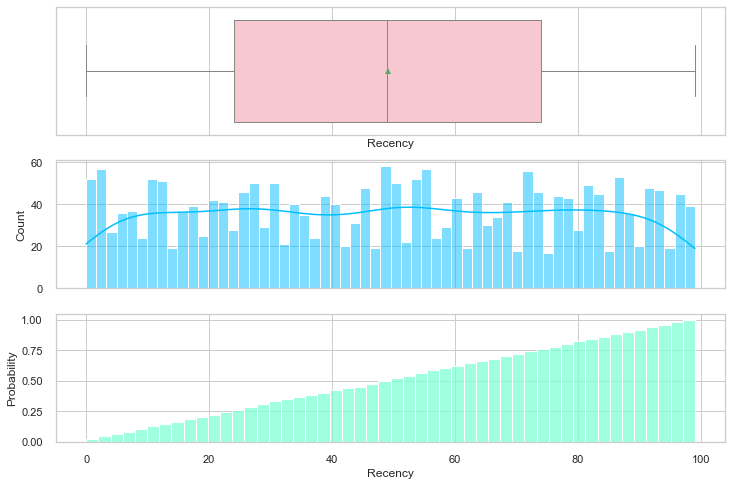

Skew: -0.001985328034291316
Kurtosis (excess kurtosis): -1.2018930462736408


In [16]:
#Feature to analize
feature='Recency'

print("Feature:",feature)
describe=df[feature].describe().round(1)
print("\nBrief statistical description:\n")
print(describe)


#Looking for outliers
print("\nLooking for outliers:")
q25, q50, q75 = np.percentile(df[feature], [25,50,75])
print("\nThe q25, q50, q75 quartiles for the feature",feature,"are:", q25, q50, q75)
iqr=q75-q25
print("Having iqr defined as: q75-q25, for the feature",feature,"the iqr is:",iqr)

#I calculate the minimum and maximum limits from which a value is considered an outlier
min=q25-1.5*(iqr)
max=q75+1.5*(iqr)
print("\nIn this way,\n - the lower limit (q25 minus 1.5 of the iqr) is:",min,"and","\n - the upper limit (q75 pusl 1.5 of the iqr) is:", max)

#Identify these points
#print("\nRecords above the defined maximum are:",[x for x in df[feature] if x > max])
#print("Records below the defined minimum are:",[m for m in df[feature] if m < min])

#Counting them
count_min=[m for m in df[feature] if m < min]
count_min=pd.Series(count_min)
print("\nCounting outliers below the minimun:")
print(count_min.value_counts())

#Counting them
count_max=[m for m in df[feature] if m > max]
count_max=pd.Series(count_max)
print("\nCounting outliers above the maximun:")
print(count_max.value_counts())

#Graphs
print("\nGraphs:")
combined_graph(df,feature)
plt.show()

#Skewness and kurotsis
print("Skew:",skew(df[feature]))
print("Kurtosis (excess kurtosis):",kurtosis(df[feature]))

Feature: MntWines

Brief statistical description:

count    2240.0
mean      303.9
std       336.6
min         0.0
25%        23.8
50%       173.5
75%       504.2
max      1493.0
Name: MntWines, dtype: float64

Looking for outliers:

The q25, q50, q75 quartiles for the feature MntWines are: 23.75 173.5 504.25
Having iqr defined as: q75-q25, for the feature MntWines the iqr is: 480.5

In this way,
 - the lower limit (q25 minus 1.5 of the iqr) is: -697.0 and 
 - the upper limit (q75 pusl 1.5 of the iqr) is: 1225.0

Counting outliers below the minimun:
Series([], dtype: int64)

Counting outliers above the maximun:
1285    3
1478    2
1492    2
1349    1
1449    1
1253    1
1396    1
1259    1
1324    1
1394    1
1379    1
1459    1
1332    1
1462    1
1315    1
1276    1
1252    1
1311    1
1248    1
1245    1
1308    1
1241    1
1239    1
1302    1
1493    1
1298    1
1296    1
1230    1
1288    1
1486    1
1279    1
dtype: int64

Graphs:


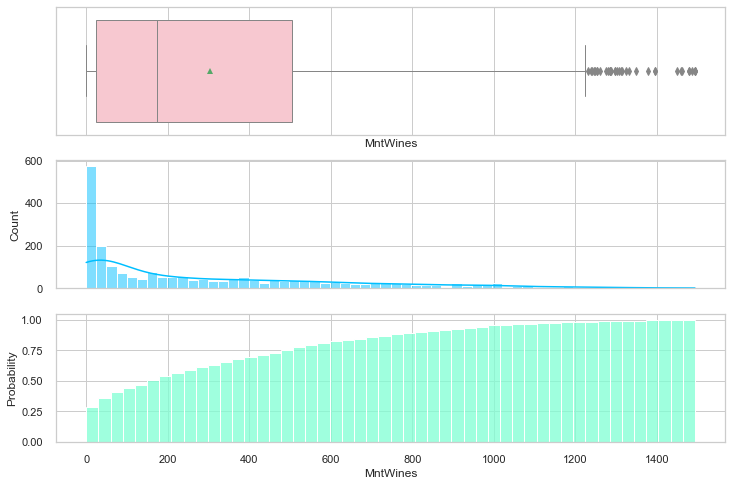

Skew: 1.1749830708938132
Kurtosis (excess kurtosis): 0.5947305711459405


In [17]:
#Feature to analize
feature='MntWines'

print("Feature:",feature)
describe=df[feature].describe().round(1)
print("\nBrief statistical description:\n")
print(describe)


#Looking for outliers
print("\nLooking for outliers:")
q25, q50, q75 = np.percentile(df[feature], [25,50,75])
print("\nThe q25, q50, q75 quartiles for the feature",feature,"are:", q25, q50, q75)
iqr=q75-q25
print("Having iqr defined as: q75-q25, for the feature",feature,"the iqr is:",iqr)

#I calculate the minimum and maximum limits from which a value is considered an outlier
min=q25-1.5*(iqr)
max=q75+1.5*(iqr)
print("\nIn this way,\n - the lower limit (q25 minus 1.5 of the iqr) is:",min,"and","\n - the upper limit (q75 pusl 1.5 of the iqr) is:", max)

#Identify these points
#print("\nRecords above the defined maximum are:",[x for x in df[feature] if x > max])
#print("Records below the defined minimum are:",[m for m in df[feature] if m < min])

#Counting them
count_min=[m for m in df[feature] if m < min]
count_min=pd.Series(count_min)
print("\nCounting outliers below the minimun:")
print(count_min.value_counts())

#Counting them
count_max=[m for m in df[feature] if m > max]
count_max=pd.Series(count_max)
print("\nCounting outliers above the maximun:")
print(count_max.value_counts())

#Graphs
print("\nGraphs:")
combined_graph(df,feature)
plt.show()

#Skewness and kurotsis
print("Skew:",skew(df[feature]))
print("Kurtosis (excess kurtosis):",kurtosis(df[feature]))

Feature: MntFruits

Brief statistical description:

count    2240.0
mean       26.3
std        39.8
min         0.0
25%         1.0
50%         8.0
75%        33.0
max       199.0
Name: MntFruits, dtype: float64

Looking for outliers:

The q25, q50, q75 quartiles for the feature MntFruits are: 1.0 8.0 33.0
Having iqr defined as: q75-q25, for the feature MntFruits the iqr is: 32.0

In this way,
 - the lower limit (q25 minus 1.5 of the iqr) is: -47.0 and 
 - the upper limit (q75 pusl 1.5 of the iqr) is: 81.0

Counting outliers below the minimun:
Series([], dtype: int64)

Counting outliers above the maximun:
107    8
138    8
129    8
83     6
114    6
      ..
131    1
130    1
166    1
164    1
149    1
Length: 78, dtype: int64

Graphs:


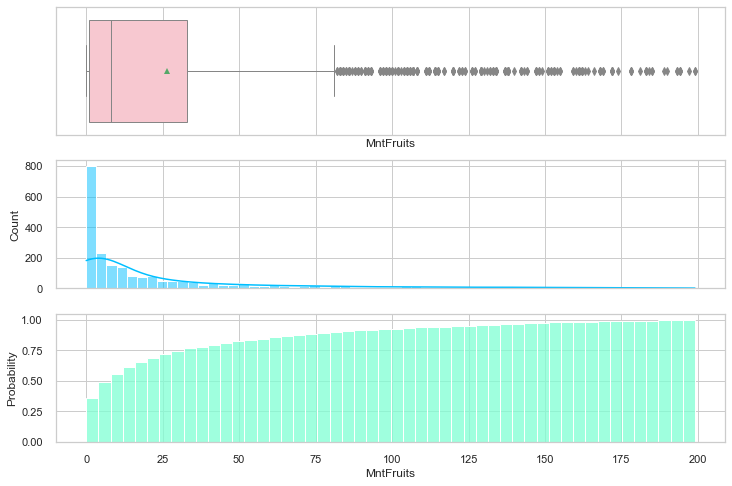

Skew: 2.1006554110275215
Kurtosis (excess kurtosis): 4.039262166899335


In [18]:
#Feature to analize
feature='MntFruits'

print("Feature:",feature)
describe=df[feature].describe().round(1)
print("\nBrief statistical description:\n")
print(describe)


#Looking for outliers
print("\nLooking for outliers:")
q25, q50, q75 = np.percentile(df[feature], [25,50,75])
print("\nThe q25, q50, q75 quartiles for the feature",feature,"are:", q25, q50, q75)
iqr=q75-q25
print("Having iqr defined as: q75-q25, for the feature",feature,"the iqr is:",iqr)

#I calculate the minimum and maximum limits from which a value is considered an outlier
min=q25-1.5*(iqr)
max=q75+1.5*(iqr)
print("\nIn this way,\n - the lower limit (q25 minus 1.5 of the iqr) is:",min,"and","\n - the upper limit (q75 pusl 1.5 of the iqr) is:", max)

#Identify these points
#print("\nRecords above the defined maximum are:",[x for x in df[feature] if x > max])
#print("Records below the defined minimum are:",[m for m in df[feature] if m < min])

#Counting them
count_min=[m for m in df[feature] if m < min]
count_min=pd.Series(count_min)
print("\nCounting outliers below the minimun:")
print(count_min.value_counts())

#Counting them
count_max=[m for m in df[feature] if m > max]
count_max=pd.Series(count_max)
print("\nCounting outliers above the maximun:")
print(count_max.value_counts())

#Graphs
print("\nGraphs:")
combined_graph(df,feature)
plt.show()

#Skewness and kurotsis
print("Skew:",skew(df[feature]))
print("Kurtosis (excess kurtosis):",kurtosis(df[feature]))

Feature: MntMeatProducts

Brief statistical description:

count    2240.0
mean      167.0
std       225.7
min         0.0
25%        16.0
50%        67.0
75%       232.0
max      1725.0
Name: MntMeatProducts, dtype: float64

Looking for outliers:

The q25, q50, q75 quartiles for the feature MntMeatProducts are: 16.0 67.0 232.0
Having iqr defined as: q75-q25, for the feature MntMeatProducts the iqr is: 216.0

In this way,
 - the lower limit (q25 minus 1.5 of the iqr) is: -308.0 and 
 - the upper limit (q75 pusl 1.5 of the iqr) is: 556.0

Counting outliers below the minimun:
Series([], dtype: int64)

Counting outliers above the maximun:
573    4
768    3
818    3
815    3
689    3
      ..
864    1
607    1
606    1
604    1
603    1
Length: 137, dtype: int64

Graphs:


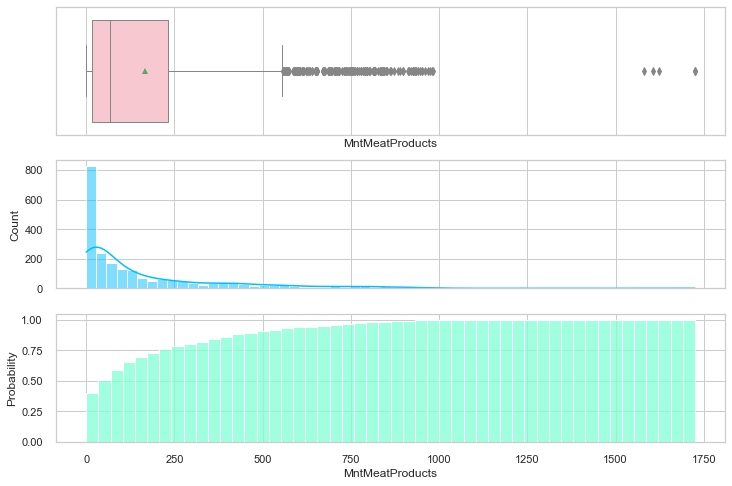

Skew: 2.0818378311977765
Kurtosis (excess kurtosis): 5.501740302800551


In [19]:
#Feature to analize
feature='MntMeatProducts'

print("Feature:",feature)
describe=df[feature].describe().round(1)
print("\nBrief statistical description:\n")
print(describe)


#Looking for outliers
print("\nLooking for outliers:")
q25, q50, q75 = np.percentile(df[feature], [25,50,75])
print("\nThe q25, q50, q75 quartiles for the feature",feature,"are:", q25, q50, q75)
iqr=q75-q25
print("Having iqr defined as: q75-q25, for the feature",feature,"the iqr is:",iqr)

#I calculate the minimum and maximum limits from which a value is considered an outlier
min=q25-1.5*(iqr)
max=q75+1.5*(iqr)
print("\nIn this way,\n - the lower limit (q25 minus 1.5 of the iqr) is:",min,"and","\n - the upper limit (q75 pusl 1.5 of the iqr) is:", max)

#Identify these points
#print("\nRecords above the defined maximum are:",[x for x in df[feature] if x > max])
#print("Records below the defined minimum are:",[m for m in df[feature] if m < min])

#Counting them
count_min=[m for m in df[feature] if m < min]
count_min=pd.Series(count_min)
print("\nCounting outliers below the minimun:")
print(count_min.value_counts())

#Counting them
count_max=[m for m in df[feature] if m > max]
count_max=pd.Series(count_max)
print("\nCounting outliers above the maximun:")
print(count_max.value_counts())

#Graphs
print("\nGraphs:")
combined_graph(df,feature)
plt.show()

#Skewness and kurotsis
print("Skew:",skew(df[feature]))
print("Kurtosis (excess kurtosis):",kurtosis(df[feature]))

Feature: MntFishProducts

Brief statistical description:

count    2240.0
mean       37.5
std        54.6
min         0.0
25%         3.0
50%        12.0
75%        50.0
max       259.0
Name: MntFishProducts, dtype: float64

Looking for outliers:

The q25, q50, q75 quartiles for the feature MntFishProducts are: 3.0 12.0 50.0
Having iqr defined as: q75-q25, for the feature MntFishProducts the iqr is: 47.0

In this way,
 - the lower limit (q25 minus 1.5 of the iqr) is: -67.5 and 
 - the upper limit (q75 pusl 1.5 of the iqr) is: 120.5

Counting outliers below the minimun:
Series([], dtype: int64)

Counting outliers above the maximun:
150    10
160     7
168     7
151     6
145     6
       ..
166     1
142     1
189     1
198     1
254     1
Length: 83, dtype: int64

Graphs:


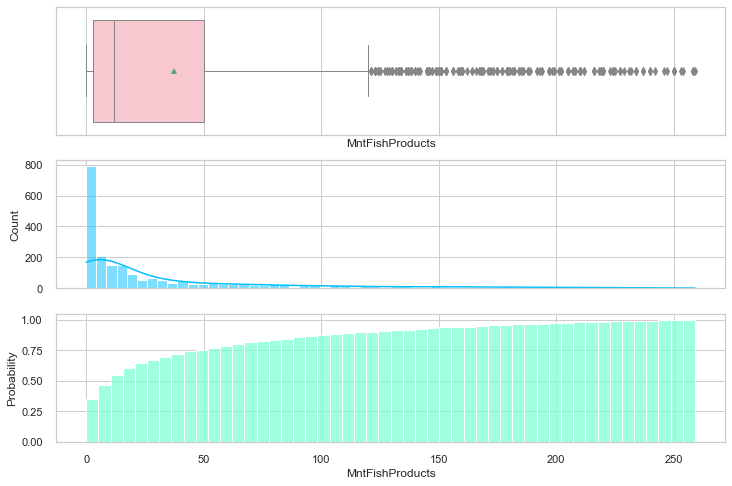

Skew: 1.9184831718871358
Kurtosis (excess kurtosis): 3.0868761114608327


In [20]:
#Feature to analize
feature='MntFishProducts'

print("Feature:",feature)
describe=df[feature].describe().round(1)
print("\nBrief statistical description:\n")
print(describe)


#Looking for outliers
print("\nLooking for outliers:")
q25, q50, q75 = np.percentile(df[feature], [25,50,75])
print("\nThe q25, q50, q75 quartiles for the feature",feature,"are:", q25, q50, q75)
iqr=q75-q25
print("Having iqr defined as: q75-q25, for the feature",feature,"the iqr is:",iqr)

#I calculate the minimum and maximum limits from which a value is considered an outlier
min=q25-1.5*(iqr)
max=q75+1.5*(iqr)
print("\nIn this way,\n - the lower limit (q25 minus 1.5 of the iqr) is:",min,"and","\n - the upper limit (q75 pusl 1.5 of the iqr) is:", max)

#Identify these points
#print("\nRecords above the defined maximum are:",[x for x in df[feature] if x > max])
#print("Records below the defined minimum are:",[m for m in df[feature] if m < min])

#Counting them
count_min=[m for m in df[feature] if m < min]
count_min=pd.Series(count_min)
print("\nCounting outliers below the minimun:")
print(count_min.value_counts())

#Counting them
count_max=[m for m in df[feature] if m > max]
count_max=pd.Series(count_max)
print("\nCounting outliers above the maximun:")
print(count_max.value_counts())

#Graphs
print("\nGraphs:")
combined_graph(df,feature)
plt.show()

#Skewness and kurotsis
print("Skew:",skew(df[feature]))
print("Kurtosis (excess kurtosis):",kurtosis(df[feature]))

Feature: MntSweetProducts

Brief statistical description:

count    2240.0
mean       27.1
std        41.3
min         0.0
25%         1.0
50%         8.0
75%        33.0
max       263.0
Name: MntSweetProducts, dtype: float64

Looking for outliers:

The q25, q50, q75 quartiles for the feature MntSweetProducts are: 1.0 8.0 33.0
Having iqr defined as: q75-q25, for the feature MntSweetProducts the iqr is: 32.0

In this way,
 - the lower limit (q25 minus 1.5 of the iqr) is: -47.0 and 
 - the upper limit (q75 pusl 1.5 of the iqr) is: 81.0

Counting outliers below the minimun:
Series([], dtype: int64)

Counting outliers above the maximun:
107    8
91     8
92     7
133    6
102    6
      ..
142    1
145    1
146    1
156    1
198    1
Length: 96, dtype: int64

Graphs:


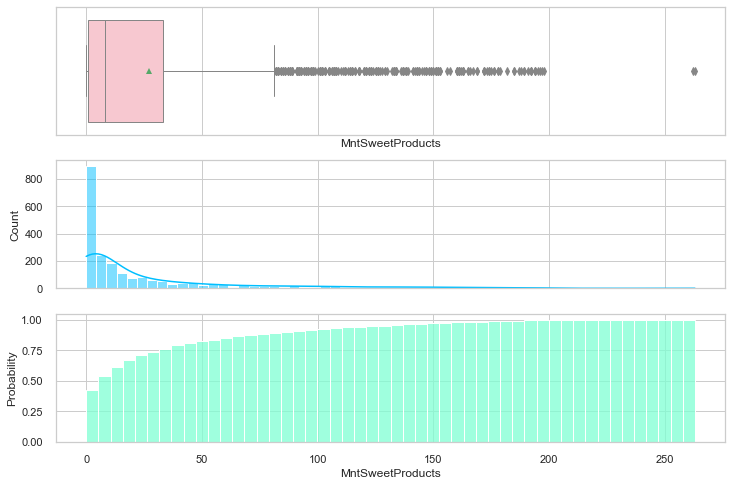

Skew: 2.1346500348068758
Kurtosis (excess kurtosis): 4.36410790719322


In [21]:
#Feature to analize
feature='MntSweetProducts'

print("Feature:",feature)
describe=df[feature].describe().round(1)
print("\nBrief statistical description:\n")
print(describe)


#Looking for outliers
print("\nLooking for outliers:")
q25, q50, q75 = np.percentile(df[feature], [25,50,75])
print("\nThe q25, q50, q75 quartiles for the feature",feature,"are:", q25, q50, q75)
iqr=q75-q25
print("Having iqr defined as: q75-q25, for the feature",feature,"the iqr is:",iqr)

#I calculate the minimum and maximum limits from which a value is considered an outlier
min=q25-1.5*(iqr)
max=q75+1.5*(iqr)
print("\nIn this way,\n - the lower limit (q25 minus 1.5 of the iqr) is:",min,"and","\n - the upper limit (q75 pusl 1.5 of the iqr) is:", max)

#Identify these points
#print("\nRecords above the defined maximum are:",[x for x in df[feature] if x > max])
#print("Records below the defined minimum are:",[m for m in df[feature] if m < min])

#Counting them
count_min=[m for m in df[feature] if m < min]
count_min=pd.Series(count_min)
print("\nCounting outliers below the minimun:")
print(count_min.value_counts())

#Counting them
count_max=[m for m in df[feature] if m > max]
count_max=pd.Series(count_max)
print("\nCounting outliers above the maximun:")
print(count_max.value_counts())

#Graphs
print("\nGraphs:")
combined_graph(df,feature)
plt.show()

#Skewness and kurotsis
print("Skew:",skew(df[feature]))
print("Kurtosis (excess kurtosis):",kurtosis(df[feature]))

Feature: MntGoldProds

Brief statistical description:

count    2240.0
mean       44.0
std        52.2
min         0.0
25%         9.0
50%        24.0
75%        56.0
max       362.0
Name: MntGoldProds, dtype: float64

Looking for outliers:

The q25, q50, q75 quartiles for the feature MntGoldProds are: 9.0 24.0 56.0
Having iqr defined as: q75-q25, for the feature MntGoldProds the iqr is: 47.0

In this way,
 - the lower limit (q25 minus 1.5 of the iqr) is: -61.5 and 
 - the upper limit (q75 pusl 1.5 of the iqr) is: 126.5

Counting outliers below the minimun:
Series([], dtype: int64)

Counting outliers above the maximun:
172    7
191    6
241    6
133    6
153    6
      ..
177    1
178    1
180    1
181    1
249    1
Length: 90, dtype: int64

Graphs:


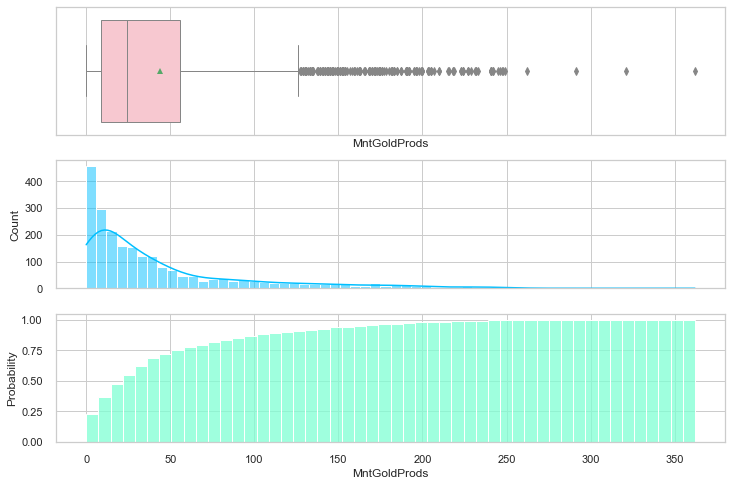

Skew: 1.8848423570307615
Kurtosis (excess kurtosis): 3.541108904819372


In [22]:
#Feature to analize
feature='MntGoldProds'

print("Feature:",feature)
describe=df[feature].describe().round(1)
print("\nBrief statistical description:\n")
print(describe)


#Looking for outliers
print("\nLooking for outliers:")
q25, q50, q75 = np.percentile(df[feature], [25,50,75])
print("\nThe q25, q50, q75 quartiles for the feature",feature,"are:", q25, q50, q75)
iqr=q75-q25
print("Having iqr defined as: q75-q25, for the feature",feature,"the iqr is:",iqr)

#I calculate the minimum and maximum limits from which a value is considered an outlier
min=q25-1.5*(iqr)
max=q75+1.5*(iqr)
print("\nIn this way,\n - the lower limit (q25 minus 1.5 of the iqr) is:",min,"and","\n - the upper limit (q75 pusl 1.5 of the iqr) is:", max)

#Identify these points
#print("\nRecords above the defined maximum are:",[x for x in df[feature] if x > max])
#print("Records below the defined minimum are:",[m for m in df[feature] if m < min])

#Counting them
count_min=[m for m in df[feature] if m < min]
count_min=pd.Series(count_min)
print("\nCounting outliers below the minimun:")
print(count_min.value_counts())

#Counting them
count_max=[m for m in df[feature] if m > max]
count_max=pd.Series(count_max)
print("\nCounting outliers above the maximun:")
print(count_max.value_counts())

#Graphs
print("\nGraphs:")
combined_graph(df,feature)
plt.show()

#Skewness and kurotsis
print("Skew:",skew(df[feature]))
print("Kurtosis (excess kurtosis):",kurtosis(df[feature]))

Feature: NumDealsPurchases

Brief statistical description:

count    2240.0
mean        2.3
std         1.9
min         0.0
25%         1.0
50%         2.0
75%         3.0
max        15.0
Name: NumDealsPurchases, dtype: float64

Looking for outliers:

The q25, q50, q75 quartiles for the feature NumDealsPurchases are: 1.0 2.0 3.0
Having iqr defined as: q75-q25, for the feature NumDealsPurchases the iqr is: 2.0

In this way,
 - the lower limit (q25 minus 1.5 of the iqr) is: -2.0 and 
 - the upper limit (q75 pusl 1.5 of the iqr) is: 6.0

Counting outliers below the minimun:
Series([], dtype: int64)

Counting outliers above the maximun:
7     40
8     14
9      8
15     7
10     5
11     5
12     4
13     3
dtype: int64

Graphs:


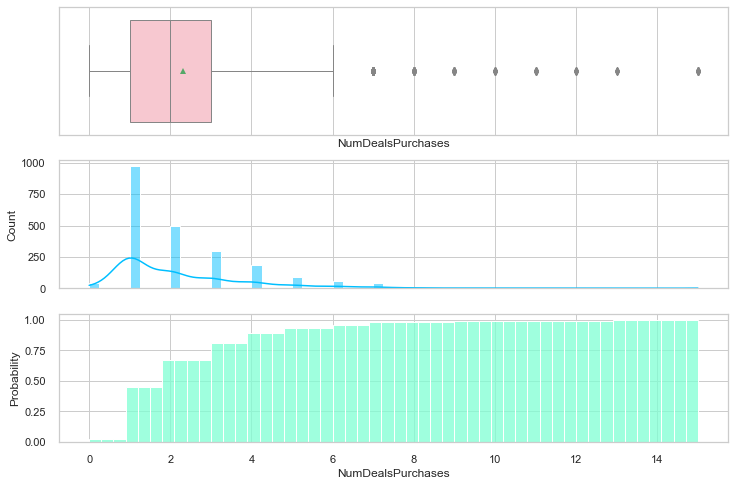

Skew: 2.416949508619042
Kurtosis (excess kurtosis): 8.914300938878899


In [23]:
#Feature to analize
feature='NumDealsPurchases'

print("Feature:",feature)
describe=df[feature].describe().round(1)
print("\nBrief statistical description:\n")
print(describe)


#Looking for outliers
print("\nLooking for outliers:")
q25, q50, q75 = np.percentile(df[feature], [25,50,75])
print("\nThe q25, q50, q75 quartiles for the feature",feature,"are:", q25, q50, q75)
iqr=q75-q25
print("Having iqr defined as: q75-q25, for the feature",feature,"the iqr is:",iqr)

#I calculate the minimum and maximum limits from which a value is considered an outlier
min=q25-1.5*(iqr)
max=q75+1.5*(iqr)
print("\nIn this way,\n - the lower limit (q25 minus 1.5 of the iqr) is:",min,"and","\n - the upper limit (q75 pusl 1.5 of the iqr) is:", max)

#Identify these points
#print("\nRecords above the defined maximum are:",[x for x in df[feature] if x > max])
#print("Records below the defined minimum are:",[m for m in df[feature] if m < min])

#Counting them
count_min=[m for m in df[feature] if m < min]
count_min=pd.Series(count_min)
print("\nCounting outliers below the minimun:")
print(count_min.value_counts())

#Counting them
count_max=[m for m in df[feature] if m > max]
count_max=pd.Series(count_max)
print("\nCounting outliers above the maximun:")
print(count_max.value_counts())

#Graphs
print("\nGraphs:")
combined_graph(df,feature)
plt.show()

#Skewness and kurotsis
print("Skew:",skew(df[feature]))
print("Kurtosis (excess kurtosis):",kurtosis(df[feature]))

Feature: NumWebPurchases

Brief statistical description:

count    2240.0
mean        4.1
std         2.8
min         0.0
25%         2.0
50%         4.0
75%         6.0
max        27.0
Name: NumWebPurchases, dtype: float64

Looking for outliers:

The q25, q50, q75 quartiles for the feature NumWebPurchases are: 2.0 4.0 6.0
Having iqr defined as: q75-q25, for the feature NumWebPurchases the iqr is: 4.0

In this way,
 - the lower limit (q25 minus 1.5 of the iqr) is: -4.0 and 
 - the upper limit (q75 pusl 1.5 of the iqr) is: 12.0

Counting outliers below the minimun:
Series([], dtype: int64)

Counting outliers above the maximun:
27    2
25    1
23    1
dtype: int64

Graphs:


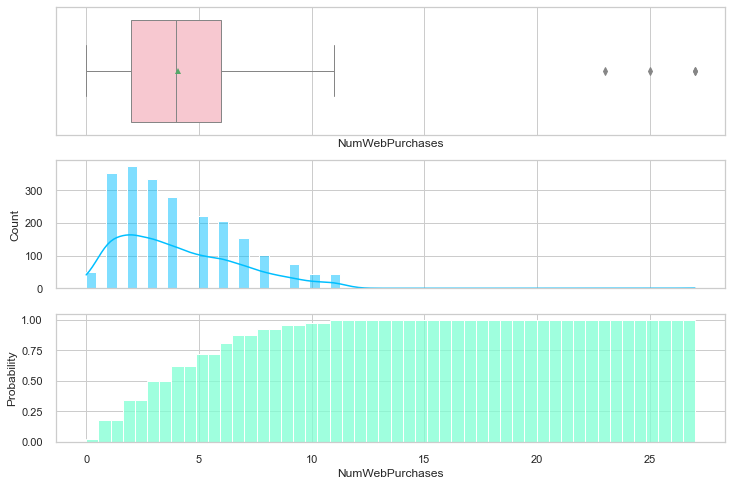

Skew: 1.3818681457832678
Kurtosis (excess kurtosis): 5.687728744626179


In [24]:
#Feature to analize
feature='NumWebPurchases'

print("Feature:",feature)
describe=df[feature].describe().round(1)
print("\nBrief statistical description:\n")
print(describe)


#Looking for outliers
print("\nLooking for outliers:")
q25, q50, q75 = np.percentile(df[feature], [25,50,75])
print("\nThe q25, q50, q75 quartiles for the feature",feature,"are:", q25, q50, q75)
iqr=q75-q25
print("Having iqr defined as: q75-q25, for the feature",feature,"the iqr is:",iqr)

#I calculate the minimum and maximum limits from which a value is considered an outlier
min=q25-1.5*(iqr)
max=q75+1.5*(iqr)
print("\nIn this way,\n - the lower limit (q25 minus 1.5 of the iqr) is:",min,"and","\n - the upper limit (q75 pusl 1.5 of the iqr) is:", max)

#Identify these points
#print("\nRecords above the defined maximum are:",[x for x in df[feature] if x > max])
#print("Records below the defined minimum are:",[m for m in df[feature] if m < min])

#Counting them
count_min=[m for m in df[feature] if m < min]
count_min=pd.Series(count_min)
print("\nCounting outliers below the minimun:")
print(count_min.value_counts())

#Counting them
count_max=[m for m in df[feature] if m > max]
count_max=pd.Series(count_max)
print("\nCounting outliers above the maximun:")
print(count_max.value_counts())

#Graphs
print("\nGraphs:")
combined_graph(df,feature)
plt.show()

#Skewness and kurotsis
print("Skew:",skew(df[feature]))
print("Kurtosis (excess kurtosis):",kurtosis(df[feature]))

Feature: NumCatalogPurchases

Brief statistical description:

count    2240.0
mean        2.7
std         2.9
min         0.0
25%         0.0
50%         2.0
75%         4.0
max        28.0
Name: NumCatalogPurchases, dtype: float64

Looking for outliers:

The q25, q50, q75 quartiles for the feature NumCatalogPurchases are: 0.0 2.0 4.0
Having iqr defined as: q75-q25, for the feature NumCatalogPurchases the iqr is: 4.0

In this way,
 - the lower limit (q25 minus 1.5 of the iqr) is: -6.0 and 
 - the upper limit (q75 pusl 1.5 of the iqr) is: 10.0

Counting outliers below the minimun:
Series([], dtype: int64)

Counting outliers above the maximun:
11    19
28     3
22     1
dtype: int64

Graphs:


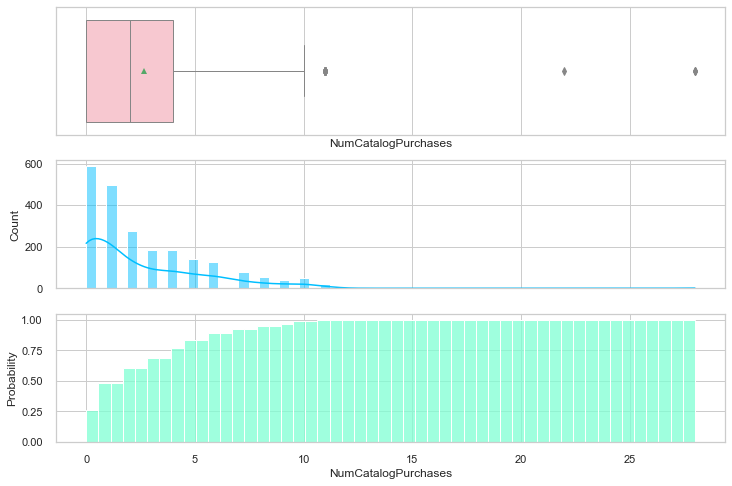

Skew: 1.879728952699662
Kurtosis (excess kurtosis): 8.026807607897045


In [25]:
#Feature to analize
feature='NumCatalogPurchases'

print("Feature:",feature)
describe=df[feature].describe().round(1)
print("\nBrief statistical description:\n")
print(describe)


#Looking for outliers
print("\nLooking for outliers:")
q25, q50, q75 = np.percentile(df[feature], [25,50,75])
print("\nThe q25, q50, q75 quartiles for the feature",feature,"are:", q25, q50, q75)
iqr=q75-q25
print("Having iqr defined as: q75-q25, for the feature",feature,"the iqr is:",iqr)

#I calculate the minimum and maximum limits from which a value is considered an outlier
min=q25-1.5*(iqr)
max=q75+1.5*(iqr)
print("\nIn this way,\n - the lower limit (q25 minus 1.5 of the iqr) is:",min,"and","\n - the upper limit (q75 pusl 1.5 of the iqr) is:", max)

#Identify these points
#print("\nRecords above the defined maximum are:",[x for x in df[feature] if x > max])
#print("Records below the defined minimum are:",[m for m in df[feature] if m < min])

#Counting them
count_min=[m for m in df[feature] if m < min]
count_min=pd.Series(count_min)
print("\nCounting outliers below the minimun:")
print(count_min.value_counts())

#Counting them
count_max=[m for m in df[feature] if m > max]
count_max=pd.Series(count_max)
print("\nCounting outliers above the maximun:")
print(count_max.value_counts())

#Graphs
print("\nGraphs:")
combined_graph(df,feature)
plt.show()

#Skewness and kurotsis
print("Skew:",skew(df[feature]))
print("Kurtosis (excess kurtosis):",kurtosis(df[feature]))

Feature: NumStorePurchases

Brief statistical description:

count    2240.0
mean        5.8
std         3.3
min         0.0
25%         3.0
50%         5.0
75%         8.0
max        13.0
Name: NumStorePurchases, dtype: float64

Looking for outliers:

The q25, q50, q75 quartiles for the feature NumStorePurchases are: 3.0 5.0 8.0
Having iqr defined as: q75-q25, for the feature NumStorePurchases the iqr is: 5.0

In this way,
 - the lower limit (q25 minus 1.5 of the iqr) is: -4.5 and 
 - the upper limit (q75 pusl 1.5 of the iqr) is: 15.5

Counting outliers below the minimun:
Series([], dtype: int64)

Counting outliers above the maximun:
Series([], dtype: int64)

Graphs:


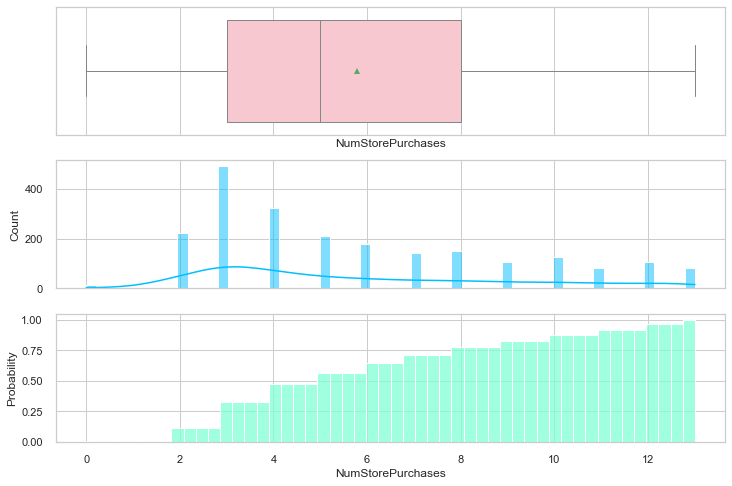

Skew: 0.701766949843736
Kurtosis (excess kurtosis): -0.6233380201794767


In [26]:
#Feature to analize
feature='NumStorePurchases'

print("Feature:",feature)
describe=df[feature].describe().round(1)
print("\nBrief statistical description:\n")
print(describe)


#Looking for outliers
print("\nLooking for outliers:")
q25, q50, q75 = np.percentile(df[feature], [25,50,75])
print("\nThe q25, q50, q75 quartiles for the feature",feature,"are:", q25, q50, q75)
iqr=q75-q25
print("Having iqr defined as: q75-q25, for the feature",feature,"the iqr is:",iqr)

#I calculate the minimum and maximum limits from which a value is considered an outlier
min=q25-1.5*(iqr)
max=q75+1.5*(iqr)
print("\nIn this way,\n - the lower limit (q25 minus 1.5 of the iqr) is:",min,"and","\n - the upper limit (q75 pusl 1.5 of the iqr) is:", max)

#Identify these points
#print("\nRecords above the defined maximum are:",[x for x in df[feature] if x > max])
#print("Records below the defined minimum are:",[m for m in df[feature] if m < min])

#Counting them
count_min=[m for m in df[feature] if m < min]
count_min=pd.Series(count_min)
print("\nCounting outliers below the minimun:")
print(count_min.value_counts())

#Counting them
count_max=[m for m in df[feature] if m > max]
count_max=pd.Series(count_max)
print("\nCounting outliers above the maximun:")
print(count_max.value_counts())

#Graphs
print("\nGraphs:")
combined_graph(df,feature)
plt.show()

#Skewness and kurotsis
print("Skew:",skew(df[feature]))
print("Kurtosis (excess kurtosis):",kurtosis(df[feature]))

Feature: NumWebVisitsMonth

Brief statistical description:

count    2240.0
mean        5.3
std         2.4
min         0.0
25%         3.0
50%         6.0
75%         7.0
max        20.0
Name: NumWebVisitsMonth, dtype: float64

Looking for outliers:

The q25, q50, q75 quartiles for the feature NumWebVisitsMonth are: 3.0 6.0 7.0
Having iqr defined as: q75-q25, for the feature NumWebVisitsMonth the iqr is: 4.0

In this way,
 - the lower limit (q25 minus 1.5 of the iqr) is: -3.0 and 
 - the upper limit (q75 pusl 1.5 of the iqr) is: 13.0

Counting outliers below the minimun:
Series([], dtype: int64)

Counting outliers above the maximun:
20    3
19    2
14    2
17    1
dtype: int64

Graphs:


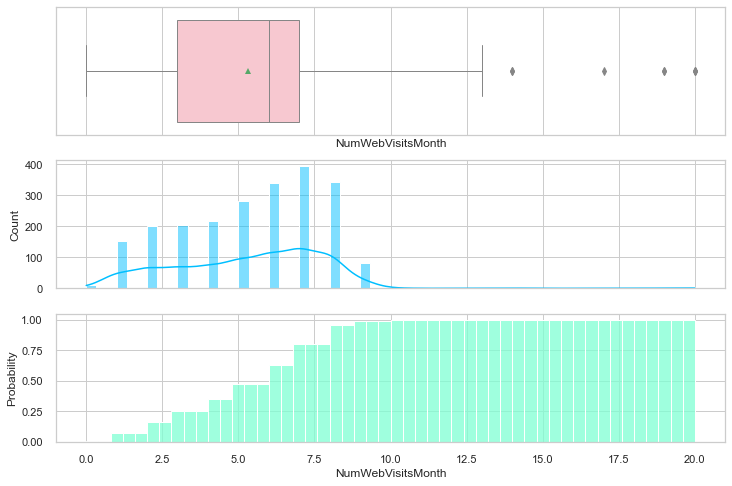

Skew: 0.2077862949945858
Kurtosis (excess kurtosis): 1.8148728894387967


In [27]:
#Feature to analize
feature='NumWebVisitsMonth'

print("Feature:",feature)
describe=df[feature].describe().round(1)
print("\nBrief statistical description:\n")
print(describe)


#Looking for outliers
print("\nLooking for outliers:")
q25, q50, q75 = np.percentile(df[feature], [25,50,75])
print("\nThe q25, q50, q75 quartiles for the feature",feature,"are:", q25, q50, q75)
iqr=q75-q25
print("Having iqr defined as: q75-q25, for the feature",feature,"the iqr is:",iqr)

#I calculate the minimum and maximum limits from which a value is considered an outlier
min=q25-1.5*(iqr)
max=q75+1.5*(iqr)
print("\nIn this way,\n - the lower limit (q25 minus 1.5 of the iqr) is:",min,"and","\n - the upper limit (q75 pusl 1.5 of the iqr) is:", max)

#Identify these points
#print("\nRecords above the defined maximum are:",[x for x in df[feature] if x > max])
#print("Records below the defined minimum are:",[m for m in df[feature] if m < min])

#Counting them
count_min=[m for m in df[feature] if m < min]
count_min=pd.Series(count_min)
print("\nCounting outliers below the minimun:")
print(count_min.value_counts())

#Counting them
count_max=[m for m in df[feature] if m > max]
count_max=pd.Series(count_max)
print("\nCounting outliers above the maximun:")
print(count_max.value_counts())

#Graphs
print("\nGraphs:")
combined_graph(df,feature)
plt.show()

#Skewness and kurotsis
print("Skew:",skew(df[feature]))
print("Kurtosis (excess kurtosis):",kurtosis(df[feature]))

#### Correlations

In [28]:
num_columns = [x for x in df.columns if x not in ['ID', 'Education','Marital_Status','Dt_Customer','Z_CostContact', 'Z_Revenue']]

# The correlation matrix
corr_mat = df[num_columns].corr()

# Strip out the diagonal values for the next step
for x in range(len(num_columns)):
    corr_mat.iloc[x,x] = 0.0
    
corr_mat

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
Year_Birth,0.000000,-0.161791,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,-0.018133,...,-0.121275,-0.128272,0.121139,0.061774,-0.060510,0.007123,-0.005930,-0.006539,-0.030128,0.021325
Income,-0.161791,0.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,0.440744,...,0.589162,0.529362,-0.553088,-0.016174,0.184400,0.335943,0.276820,0.087545,-0.027225,0.133047
Kidhome,0.230176,-0.428669,0.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,...,-0.502237,-0.499683,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,-0.080008
Teenhome,-0.352111,0.019133,-0.036133,0.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,...,-0.110769,0.050695,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,0.003138,-0.154446
Recency,-0.019871,-0.003970,0.008827,0.016198,0.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,...,0.025110,0.000799,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,0.013231,-0.198437
MntWines,-0.157773,0.578650,-0.496297,0.004846,0.016064,0.000000,0.389637,0.562667,0.399753,0.386581,...,0.635226,0.642100,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,-0.039007,0.247254
MntFruits,-0.017917,0.430842,-0.372581,-0.176764,-0.004306,0.389637,0.000000,0.543105,0.594804,0.567164,...,0.487917,0.461758,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,-0.005166,0.125289
MntMeatProducts,-0.030872,0.584633,-0.437129,-0.261160,0.023056,0.562667,0.543105,0.000000,0.568402,0.523846,...,0.723827,0.479659,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,-0.023483,0.236335
MntFishProducts,-0.041625,0.438871,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,0.000000,0.579870,...,0.534478,0.459855,-0.446003,0.000357,0.016843,0.199578,0.260762,0.002577,-0.020953,0.111331
MntSweetProducts,-0.018133,0.440744,-0.370673,-0.162475,0.022670,0.386581,0.567164,0.523846,0.579870,0.000000,...,0.490924,0.448756,-0.423294,0.001530,0.028641,0.259590,0.241818,0.009985,-0.022485,0.117372


In [29]:
# Pairwise maximal correlations
corr_mat.abs().idxmax()

Year_Birth                        Teenhome
Income                 NumCatalogPurchases
Kidhome                NumCatalogPurchases
Teenhome                 NumDealsPurchases
Recency                           Response
MntWines                 NumStorePurchases
MntFruits                  MntFishProducts
MntMeatProducts        NumCatalogPurchases
MntFishProducts                  MntFruits
MntSweetProducts           MntFishProducts
MntGoldProds           NumCatalogPurchases
NumDealsPurchases                 Teenhome
NumWebPurchases                   MntWines
NumCatalogPurchases        MntMeatProducts
NumStorePurchases                 MntWines
NumWebVisitsMonth                   Income
AcceptedCmp3                      Response
AcceptedCmp4                      MntWines
AcceptedCmp5                      MntWines
AcceptedCmp1                  AcceptedCmp5
AcceptedCmp2                  AcceptedCmp4
Complain                           Kidhome
Response                      AcceptedCmp5
dtype: obje

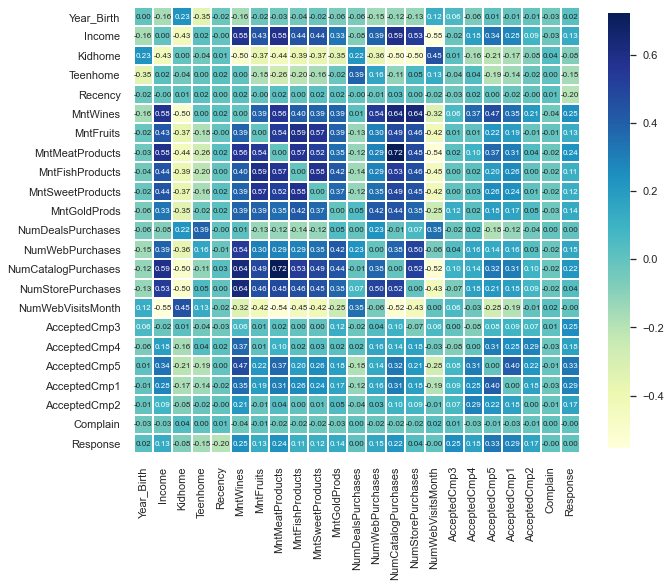

In [30]:
#Heatmap
plt.figure(figsize=(10,10))
sns.set_theme(style="whitegrid") 

#mask = np.triu(np.ones_like(df.corr(),dtype = bool))

sns.heatmap(corr_mat, 
            cbar=True, 
            square=True, 
            annot=True,
            linecolor='white',
            linewidths=1,
            fmt='.2f',
            annot_kws={'size': 8},
            cbar_kws={"shrink": 0.8},
            #mask=mask,
            cmap="YlGnBu") 

#Roto los ejes
plt.xticks(rotation = 90)

plt.show()

In [31]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

# 3. Feature engineer

#### Dealing with missing values

In [32]:
median=df['Income'].median()
df['Income'].fillna(median, inplace=True)
print("Number of null values in income column: {}".format(df['Income'].isnull().sum()))

Number of null values in income column: 0


#### Changing types

In [33]:
#data['Dt_Customer'] = (pd.to_datetime('2017-01-01') - pd.to_datetime(data['Dt_Customer'])).dt.days 
df["Dt_Customer"] = pd.DatetimeIndex(df["Dt_Customer"]).year

In [34]:
df["Dt_Customer"]

0       2012
1       2014
2       2013
3       2014
4       2014
        ... 
2235    2013
2236    2014
2237    2014
2238    2014
2239    2012
Name: Dt_Customer, Length: 2240, dtype: int64

#### Creating new features

In [35]:
#Age of customer today 
df["Age"]=2021-df["Year_Birth"]
df['Age'].value_counts().sort_values(ascending=True)

121     1
81      1
80      1
122     1
128     1
25      2
27      3
28      5
26      5
78      7
77      7
76      8
29     13
30     15
75     16
74     16
31     18
73     21
34     27
71     29
33     29
72     30
32     30
36     32
68     35
60     36
37     38
40     39
41     39
35     42
57     42
38     42
64     43
70     43
59     44
54     44
58     45
39     45
66     49
61     49
55     50
67     50
62     51
53     51
44     52
69     52
42     53
63     53
65     55
47     69
52     71
56     74
48     74
51     77
43     77
49     79
46     83
50     87
45     89
Name: Age, dtype: int64

In [36]:
#Total spendings on various items
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]
df["Spent"].value_counts().sort_values(ascending=False)

46      19
22      18
57      16
55      15
44      15
        ..
1151     1
1155     1
1159     1
1165     1
2047     1
Name: Spent, Length: 1054, dtype: int64

In [37]:
#Reducing categories in Marital Status
df["Mar_Status"]=df["Marital_Status"].replace({
    "Married":"Partner", 
    "Together":"Partner", 
    "Absurd":"Alone", 
    "Widow":"Alone", 
    "YOLO":"Alone", 
    "Divorced":"Alone", 
    "Single":"Alone",})

df["Mar_Status"].value_counts()

Partner    1444
Alone       796
Name: Mar_Status, dtype: int64

In [38]:
#Total children living in the household
df["Children"]=df["Kidhome"]+df["Teenhome"]
df["Children"].value_counts()

1    1128
0     638
2     421
3      53
Name: Children, dtype: int64

In [39]:
#Feature for total members in the householde
df["Family_Size"] = df["Mar_Status"].replace({"Alone": 1, "Partner":2})+ df["Children"]
df["Family_Size"].value_counts()

3    889
2    764
4    301
1    254
5     32
Name: Family_Size, dtype: int64

In [40]:
#Feature pertaining parenthood
df["Is_Parent"] = np.where(df.Children> 0, 1, 0)
df["Is_Parent"].value_counts()

1    1602
0     638
Name: Is_Parent, dtype: int64

In [41]:
#Segmenting education levels in three groups
df["Education"]=df["Education"].replace({
    "Basic":"Undergraduate",
    "2n Cycle":"Undergraduate", 
    "Graduation":"Graduate", 
    "Master":"Postgraduate", 
    "PhD":"Postgraduate"})

df["Education"].value_counts()

Graduate         1127
Postgraduate      856
Undergraduate     257
Name: Education, dtype: int64

In [42]:
#Renaming some columns
df=df.rename(columns={
    "MntWines": "Wines",
    "MntFruits":"Fruits",
    "MntMeatProducts":"Meat",
    "MntFishProducts":"Fish",
    "MntSweetProducts":"Sweets",
    "MntGoldProds":"Gold"})

#### Checking correlations again

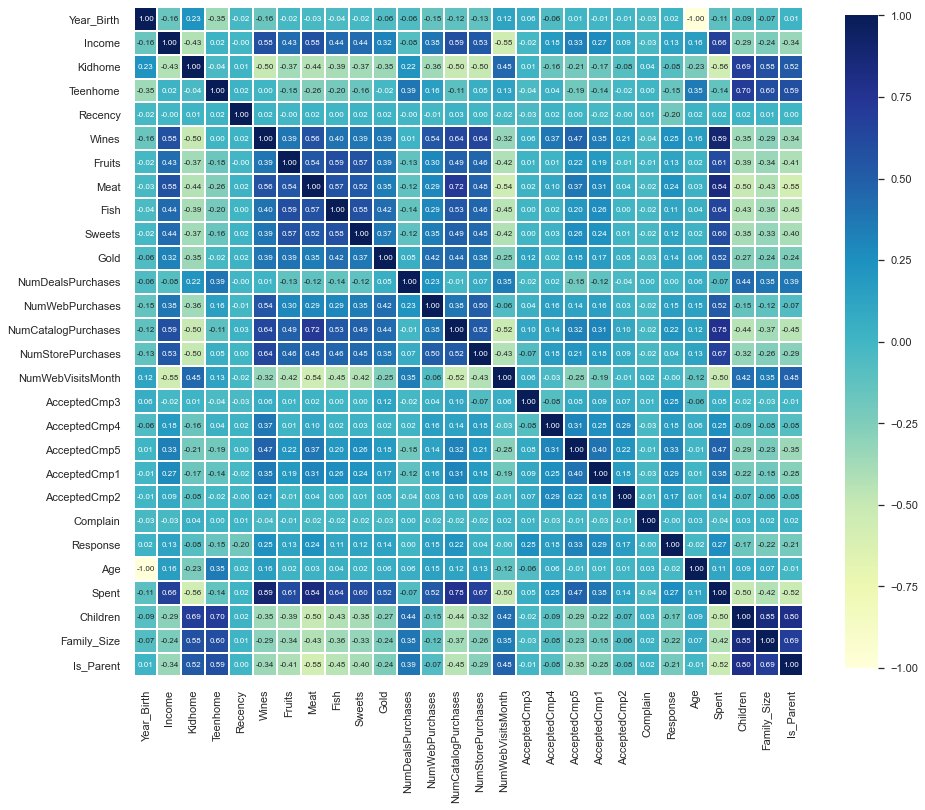

In [43]:
num_columns = [x for x in df.columns if x not in ['ID', 'Education','Marital_Status','Dt_Customer','Z_CostContact', 'Z_Revenue']]

# The correlation matrix
corr_mat = df[num_columns].corr()

#Heatmap
plt.figure(figsize=(15,15))
sns.set_theme(style="whitegrid") 

#mask = np.triu(np.ones_like(df.corr(),dtype = bool))

sns.heatmap(corr_mat, 
            cbar=True, 
            square=True, 
            annot=True,
            linecolor='white',
            linewidths=1,
            fmt='.2f',
            annot_kws={'size': 8},
            cbar_kws={"shrink": 0.8},
            #mask=mask,
            cmap="YlGnBu") 

#Roto los ejes
plt.xticks(rotation = 90)

plt.show()

In [45]:
cols = corr_mat.columns.tolist()
for i in range(0,len(corr_mat)):
    for j in range(0,len(corr_mat)):
        if( (j> i) & (abs(corr_mat.iloc[i,j])>0.7)):
            print("{} - {} : HIGHLY {} CORRELATED , r={}".format(cols[i], cols[j], ("+ly" if (corr_mat.iloc[i,j] >0) else "-ly"), corr_mat.iloc[i,j]))
        elif((j> i) & (abs(corr_mat.iloc[i,j])>0.5)):
            print("{} - {} : moderately {} correlated , r={}".format(cols[i], cols[j], ("+ly" if (corr_mat.iloc[i,j] >0) else "-ly"), corr_mat.iloc[i,j]))


Year_Birth - Age : HIGHLY -ly CORRELATED , r=-1.000000000000001
Income - Wines : moderately +ly correlated , r=0.5769030776432151
Income - Meat : moderately +ly correlated , r=0.5778054555111541
Income - NumCatalogPurchases : moderately +ly correlated , r=0.586825963505871
Income - NumStorePurchases : moderately +ly correlated , r=0.5265997862670989
Income - NumWebVisitsMonth : moderately -ly correlated , r=-0.5497849888490376
Income - Spent : moderately +ly correlated , r=0.6647748566757213
Kidhome - NumCatalogPurchases : moderately -ly correlated , r=-0.5022372229807835
Kidhome - Spent : moderately -ly correlated , r=-0.5566690768696271
Kidhome - Children : moderately +ly correlated , r=0.6899710958933076
Kidhome - Family_Size : moderately +ly correlated , r=0.5843567319815369
Kidhome - Is_Parent : moderately +ly correlated , r=0.5207719589148
Teenhome - Children : moderately +ly correlated , r=0.6984334149931062
Teenhome - Family_Size : moderately +ly correlated , r=0.59520554670902

#### Droping some irrelevant columns

In [46]:
df.drop(['ID','Z_CostContact', 'Z_Revenue','Year_Birth','Marital_Status','Kidhome', 'Teenhome'], axis=1, inplace=True)
df.head()

,Education,Income,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Mar_Status,Children,Family_Size,Is_Parent
0,Graduate,58138.0,2012,58,635,88,546,172,88,88,...,0,0,0,1,64,1617,Alone,0,1,0
1,Graduate,46344.0,2014,38,11,1,6,2,1,6,...,0,0,0,0,67,27,Alone,2,3,1
2,Graduate,71613.0,2013,26,426,49,127,111,21,42,...,0,0,0,0,56,776,Partner,0,2,0
3,Graduate,26646.0,2014,26,11,4,20,10,3,5,...,0,0,0,0,37,53,Partner,1,3,1
4,Postgraduate,58293.0,2014,94,173,43,118,46,27,15,...,0,0,0,0,40,422,Partner,1,3,1


#### Outliers

In [47]:
df = df[(df["Age"]<90)]
df = df[(df["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(df))

The total number of data-points after removing the outliers are: 2236


#### One hot encoder

In [48]:
df1 = df.copy()

In [49]:
#Get list of categorical variables
cat_var=(df1.dtypes == 'object')
object_cols = list(cat_var[cat_var].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Mar_Status']


In [50]:
df1 = pd.get_dummies(df1, columns=object_cols, drop_first=True)
df1.columns

Index(['Income', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Spent', 'Children',
       'Family_Size', 'Is_Parent', 'Education_Postgraduate',
       'Education_Undergraduate', 'Mar_Status_Partner'],
      dtype='object')

In [51]:
le=LabelEncoder()
df1['Children'] = df1[['Children']].apply(le.fit_transform)

#### Log transform on skewed columns

In [52]:
skew_columns = (df1
                .skew()
                .sort_values(ascending=False))

skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

Complain                   10.438160
AcceptedCmp2                8.464221
AcceptedCmp1                3.551553
AcceptedCmp5                3.300787
AcceptedCmp3                3.287997
AcceptedCmp4                3.237901
Education_Undergraduate     2.430077
NumDealsPurchases           2.418461
Sweets                      2.135674
Fruits                      2.104241
Meat                        2.085282
Response                    1.968607
Fish                        1.919970
Gold                        1.885136
NumCatalogPurchases         1.881437
NumWebPurchases             1.381134
Wines                       1.176036
Spent                       0.860174
dtype: float64

In [53]:
# Perform log transform on skewed columns
for col in skew_columns.index.tolist():
    df1[col] = np.log1p(df1[col])

In [54]:
df1[col]

0       7.388946
1       3.332205
2       6.655440
3       3.988984
4       6.047372
          ...   
2235    7.201916
2236    6.098074
2237    7.124478
2238    6.738152
2239    5.153292
Name: Spent, Length: 2236, dtype: float64

In [55]:
skew_columns_trans = (df1
                .skew()
                .sort_values(ascending=False))

skew_columns_trans = skew_columns_trans.loc[skew_columns_trans > 0.75]
skew_columns_trans

Education_Undergraduate          inf
Complain                   10.438160
AcceptedCmp2                8.464221
AcceptedCmp1                3.551553
AcceptedCmp5                3.300787
AcceptedCmp3                3.287997
AcceptedCmp4                3.237901
Response                    1.968607
dtype: float64

In [56]:
df.head()

,Education,Income,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Mar_Status,Children,Family_Size,Is_Parent
0,Graduate,58138.0,2012,58,635,88,546,172,88,88,...,0,0,0,1,64,1617,Alone,0,1,0
1,Graduate,46344.0,2014,38,11,1,6,2,1,6,...,0,0,0,0,67,27,Alone,2,3,1
2,Graduate,71613.0,2013,26,426,49,127,111,21,42,...,0,0,0,0,56,776,Partner,0,2,0
3,Graduate,26646.0,2014,26,11,4,20,10,3,5,...,0,0,0,0,37,53,Partner,1,3,1
4,Postgraduate,58293.0,2014,94,173,43,118,46,27,15,...,0,0,0,0,40,422,Partner,1,3,1


In [57]:
df1.head()

,Income,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,...,Complain,Response,Age,Spent,Children,Family_Size,Is_Parent,Education_Postgraduate,Education_Undergraduate,Mar_Status_Partner
0,58138.0,2012,58,6.455199,4.488636,6.304449,5.153292,4.488636,4.488636,1.386294,...,0.0,0.693147,64,7.388946,0,1,0,0,0.0,0
1,46344.0,2014,38,2.484907,0.693147,1.945910,1.098612,0.693147,1.945910,1.098612,...,0.0,0.000000,67,3.332205,2,3,1,0,0.0,0
2,71613.0,2013,26,6.056784,3.912023,4.852030,4.718499,3.091042,3.761200,0.693147,...,0.0,0.000000,56,6.655440,0,2,0,0,0.0,1
3,26646.0,2014,26,2.484907,1.609438,3.044522,2.397895,1.386294,1.791759,1.098612,...,0.0,0.000000,37,3.988984,1,3,1,0,0.0,1
4,58293.0,2014,94,5.159055,3.784190,4.779123,3.850148,3.332205,2.772589,1.791759,...,0.0,0.000000,40,6.047372,1,3,1,1,0.0,1


#### Feature scaling

In [58]:
scaler = StandardScaler()
scaler.fit(df1)
scaled_df = pd.DataFrame(scaler.transform(df1),columns= df1.columns )
scaled_df.head(4)

,Income,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,...,Complain,Response,Age,Spent,Children,Family_Size,Is_Parent,Education_Postgraduate,Education_Undergraduate,Mar_Status_Partner
0,0.288947,-1.500981,0.306856,0.987047,1.433415,1.395047,1.579760,1.410558,1.062164,0.652625,...,-0.095001,2.386338,1.016868,1.202519,-1.264308,-1.758810,-1.584362,-0.78684,-0.35878,-1.347635
1,-0.262003,1.419988,-0.383971,-1.215042,-0.984619,-1.398879,-0.866121,-0.971131,-0.912916,0.042160,...,-0.095001,-0.419052,1.273264,-1.558363,1.395139,0.445618,0.631169,-0.78684,-0.35878,-1.347635
2,0.918423,-0.040496,-0.798467,0.766070,1.066065,0.464013,1.317483,0.533561,0.497123,-0.818241,...,-0.095001,-0.419052,0.333146,0.703320,-1.264308,-0.656596,-1.584362,-0.78684,-0.35878,0.742041
3,-1.182183,1.419988,-0.798467,-1.215042,-0.400868,-0.694643,-0.082362,-0.536177,-1.032654,0.042160,...,-0.095001,-0.419052,-1.290693,-1.111381,0.065416,0.445618,0.631169,-0.78684,-0.35878,0.742041


# 4. PCA

In [59]:
pca_list = list()
feature_weight_list = list()

# Fit a range of PCA models

for n in range(1, 20):
    
    # Create and fit the model
    PCAmod = PCA(n_components=n)
    PCAmod.fit(scaled_df)
    
    # Store the model and variance
    pca_list.append(pd.Series({'n':n, 'model':PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()}))
    
    # Calculate and store feature importances
    abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'n':n, 
                                             'features': scaled_df.columns,
                                             'values':abs_feature_values/abs_feature_values.sum()}))
    
pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
pca_df

,model,var
n,,
1,PCA(n_components=1),0.310002
2,PCA(n_components=2),0.40744
3,PCA(n_components=3),0.476117
4,PCA(n_components=4),0.535712
5,PCA(n_components=5),0.584607
6,PCA(n_components=6),0.625486
7,PCA(n_components=7),0.66055
8,PCA(n_components=8),0.695143
9,PCA(n_components=9),0.729274


In [60]:
features_df = (pd.concat(feature_weight_list)
               .pivot(index='n', columns='features', values='values'))

features_df

features,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Age,Children,Complain,Dt_Customer,Education_Postgraduate,...,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Response,Spent,Sweets,Wines
n,,,,,,,,,,,,,,,,,,,,,
1,0.028333,0.009186,0.002786,0.016371,0.032647,0.009979,0.046463,0.002833,0.008920,0.000402,...,0.067270,0.010784,0.057137,0.050729,0.045509,0.000909,0.020454,0.071518,0.057138,0.063025
2,0.025885,0.007858,0.003971,0.013140,0.032137,0.025270,0.067478,0.002158,0.020316,0.012120,...,0.044862,0.059417,0.047307,0.060388,0.043445,0.003304,0.017506,0.055975,0.032870,0.060440
3,0.040448,0.030589,0.010727,0.039004,0.047819,0.028306,0.049238,0.003863,0.023783,0.034203,...,0.032068,0.047318,0.034365,0.042277,0.030282,0.008539,0.034333,0.038118,0.039545,0.050769
4,0.038848,0.033934,0.025534,0.035658,0.042101,0.036516,0.037832,0.004733,0.040147,0.039302,...,0.025224,0.046884,0.031956,0.038173,0.044975,0.013931,0.050849,0.029132,0.031437,0.041959
5,0.043967,0.037044,0.022022,0.037219,0.046415,0.037131,0.035023,0.004979,0.039468,0.049355,...,0.021218,0.041918,0.026218,0.034657,0.041506,0.015059,0.047241,0.025034,0.030791,0.037792
6,0.039605,0.042273,0.041269,0.050398,0.039465,0.032536,0.031848,0.005263,0.040706,0.047943,...,0.020728,0.038925,0.026236,0.030711,0.040336,0.029231,0.050488,0.022138,0.028061,0.033370
7,0.036750,0.040282,0.050962,0.046616,0.035638,0.032837,0.034075,0.021608,0.046849,0.049064,...,0.020410,0.034837,0.024528,0.027363,0.039327,0.043323,0.046451,0.019782,0.024686,0.029127
8,0.035137,0.038873,0.052973,0.042564,0.033724,0.031993,0.034329,0.047181,0.052916,0.047253,...,0.019221,0.033345,0.022873,0.025753,0.037362,0.043905,0.044421,0.018113,0.023009,0.026529
9,0.032733,0.035462,0.054573,0.041613,0.031352,0.032355,0.035690,0.047022,0.057931,0.049600,...,0.018247,0.032793,0.022928,0.023578,0.037174,0.058236,0.041143,0.016619,0.021784,0.024137


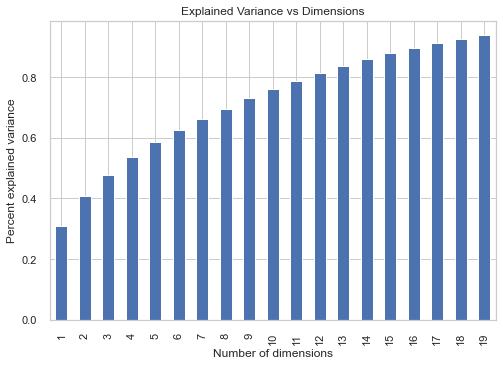

In [61]:
#sns.set_context('talk')
ax = pca_df['var'].plot(kind='bar')

ax.set(xlabel='Number of dimensions',
       ylabel='Percent explained variance',
       title='Explained Variance vs Dimensions');

In [62]:
pca = PCA(n_components=11)
pca.fit(scaled_df)
PCA_df1 = pd.DataFrame(pca.transform(scaled_df), columns=(
    ["col1","col2", "col3","col4","col5","col6","col7","col8","col9","col10","col11"]))
PCA_df1.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2236.0,-2.959271e-17,2.999013,-7.045530,-2.606493,0.137522,2.717510,7.342121
col2,2236.0,-5.620628e-17,1.681360,-5.318403,-1.306446,0.125836,1.259530,5.678929
col3,2236.0,3.227393e-17,1.411591,-3.321999,-0.923816,-0.185389,0.705689,7.811663
col4,2236.0,-1.827201e-17,1.314912,-4.071924,-0.917004,-0.111783,0.813134,5.007314
col5,2236.0,-1.936436e-18,1.191068,-3.410849,-0.812062,0.039633,0.789264,5.012946
col6,2236.0,-8.480594e-17,1.089133,-4.044005,-0.527219,0.019795,0.594910,5.343339
col7,2236.0,-7.139985e-17,1.008677,-2.916642,-0.651493,-0.062062,0.512517,6.395410
col8,2236.0,3.406140e-17,1.001688,-2.051313,-0.428153,-0.062781,0.305455,9.594171
col9,2236.0,4.995011e-17,0.995114,-3.064934,-0.711412,-0.013420,0.664079,3.583535
col10,2236.0,-2.840105e-17,0.927423,-2.702176,-0.669078,-0.056084,0.607553,3.571452


# 5. Modeling

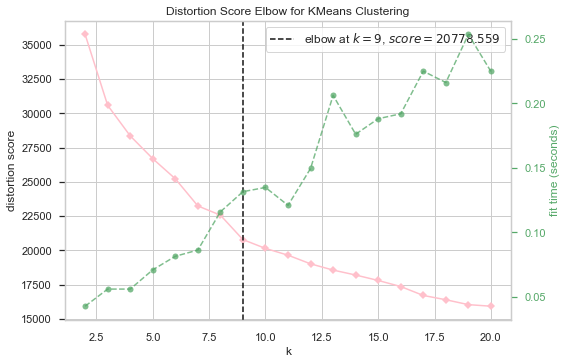

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [74]:
# Quick examination of elbow method to find numbers of clusters to make.
Elbow_M = KElbowVisualizer(KMeans(), k=20)
Elbow_M.fit(PCA_df1)
Elbow_M.show()

## 5.1 Agglomerative clustering - With PCA

In [93]:
#Initiating the Agglomerative Clustering model 
AC_PCA = AgglomerativeClustering(n_clusters=3,
                                 linkage='ward', 
                                 compute_full_tree=True
                                )
# fit model and predict clusters
y_pred_AC_PCA = AC_PCA.fit_predict(PCA_df1)
PCA_df1["Clusters_AC"] = y_pred_AC_PCA
#Adding the Clusters feature to the orignal dataframe.
df["Clusters_AC"]= y_pred_AC_PCA

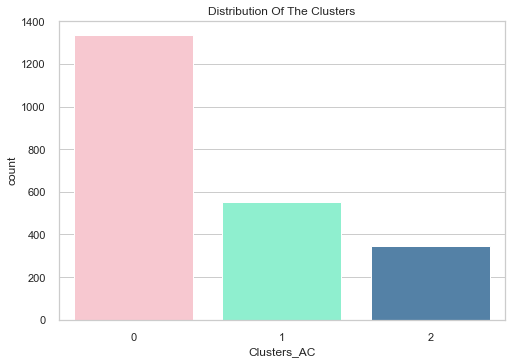

In [94]:
sns.set_palette(["pink", "aquamarine","steelblue"])
ax=sns.countplot(x=df["Clusters_AC"])
ax.set_title("Distribution Of The Clusters")
plt.show()

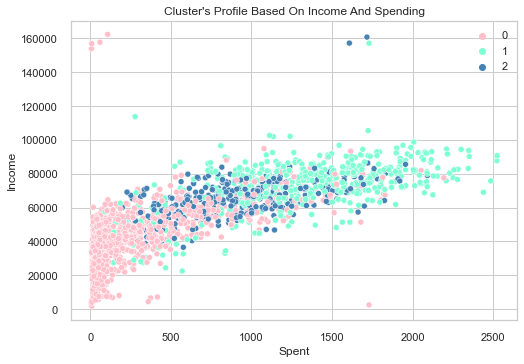

In [97]:
pl = sns.scatterplot(data=df,
                     x=df["Spent"], 
                     y=df["Income"],
                     hue=df["Clusters_AC"],
                     palette=["pink", "aquamarine","steelblue"]
                    )

pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

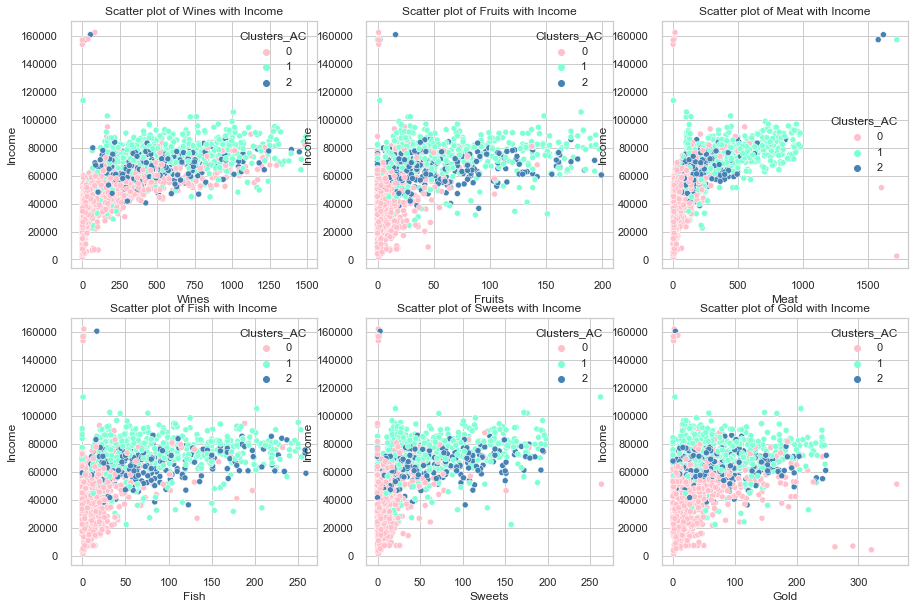

In [99]:
plt.figure(1, figsize= (15,10))
n=0
for x in ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold' ]:
    n+=1
    plt.subplot(2,3,n)
    sns.scatterplot(data = df, 
                    x =x, 
                    y='Income', 
                    hue = 'Clusters_AC', 
                    palette=["pink", "aquamarine","steelblue"])
    plt.title('Scatter plot of {} with Income'.format(x))
                 
plt.show()

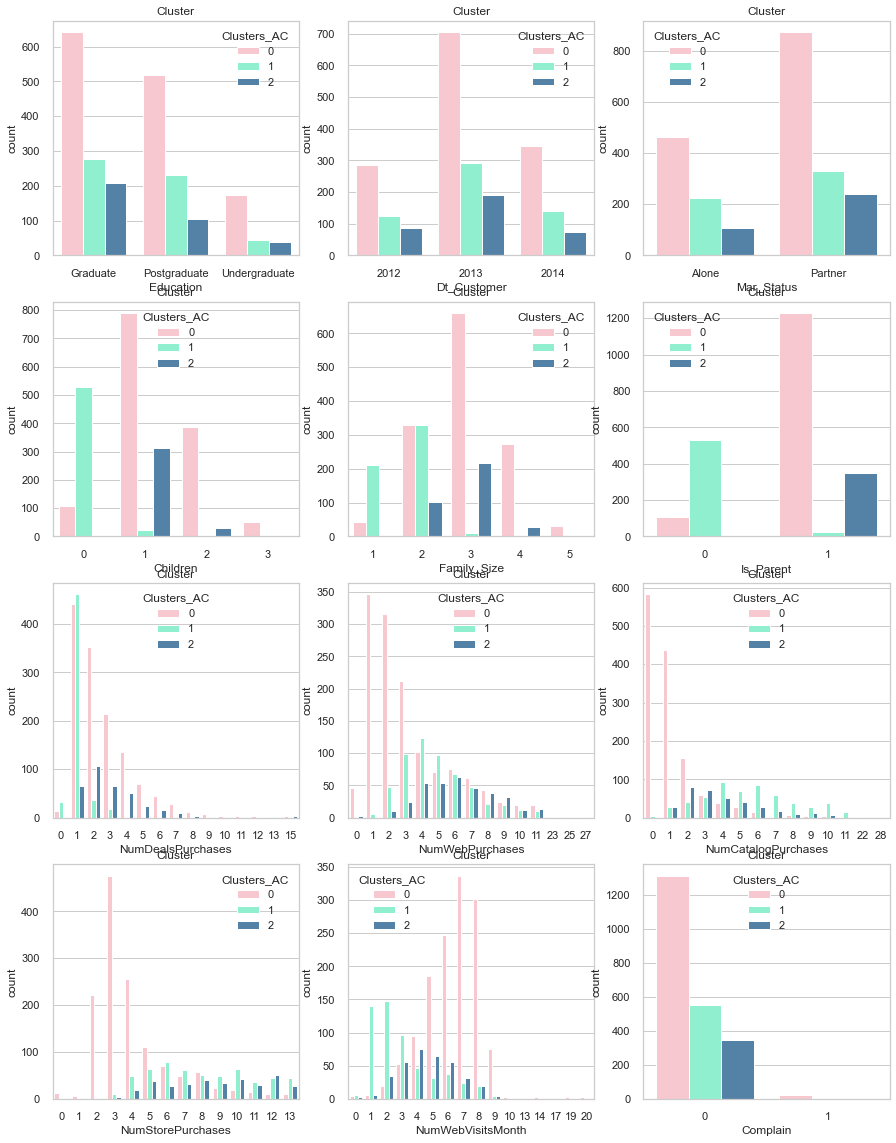

In [100]:
plt.figure(1, figsize= (15,25))
n=0
for x in ['Education', 'Dt_Customer',
       'Mar_Status', 'Children', 'Family_Size', 'Is_Parent',
         'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
          'NumWebVisitsMonth',  'Complain']:
    n+=1
    plt.subplot(5,3,n)
    sns.countplot(data=df,
                   x=x,
                   hue='Clusters_AC',
                   palette=["pink", "aquamarine","steelblue"])
        
    plt.title('Cluster'.format(x))
                 
plt.show()

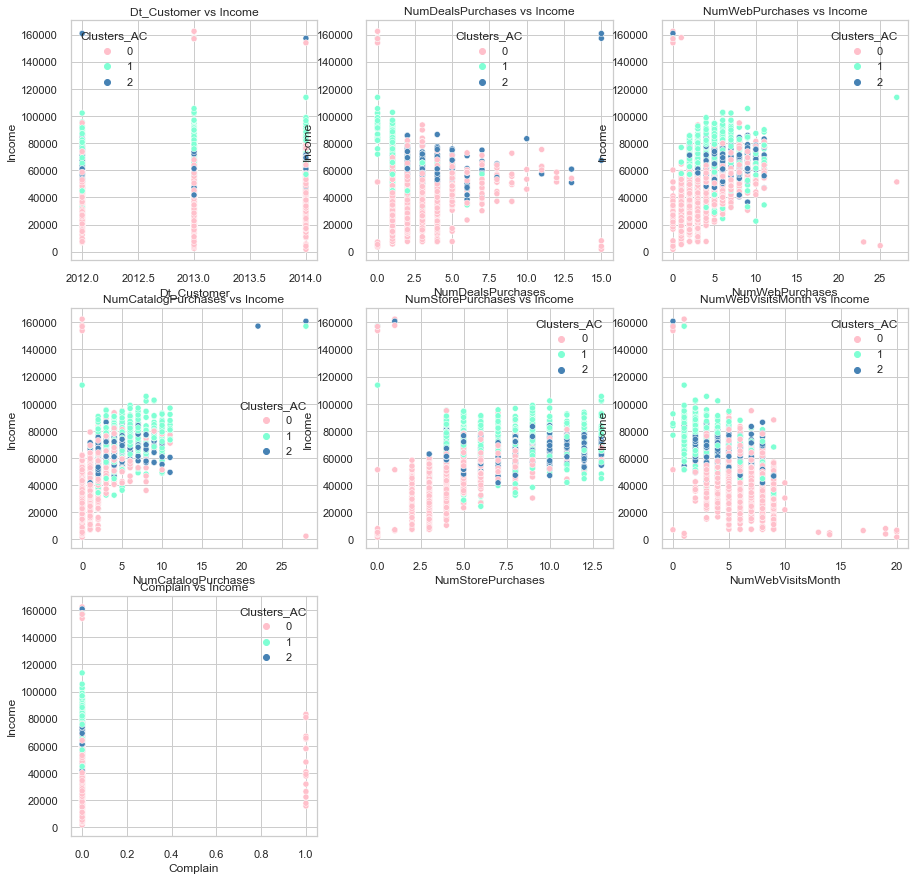

In [101]:
plt.figure(1, figsize= (15,15))
n=0
for x in ['Dt_Customer', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',  'Complain' ]:
    n+=1
    plt.subplot(3,3,n)
    sns.scatterplot(data = df, 
                    x =x, 
                    y='Income', 
                    hue = 'Clusters_AC', 
                    palette=["pink", "aquamarine","steelblue"])
    plt.title('{} vs Income'.format(x))
                 
plt.show()

## 5.2 K-means clustering - With PCA

In [102]:
num_clusters = 3
km = KMeans(n_clusters=num_clusters)
df['Clusters_KM'] = km.fit_predict(PCA_df1)

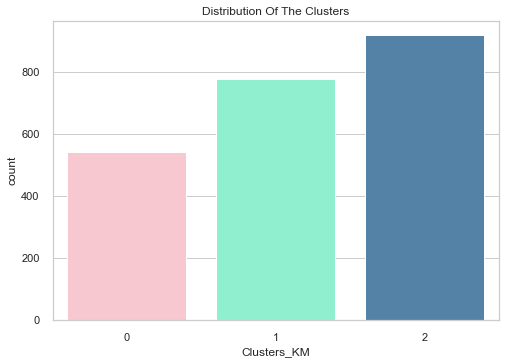

In [103]:
sns.set_palette(["pink", "aquamarine","steelblue"])
ax=sns.countplot(x=df["Clusters_KM"])
ax.set_title("Distribution Of The Clusters")
plt.show()

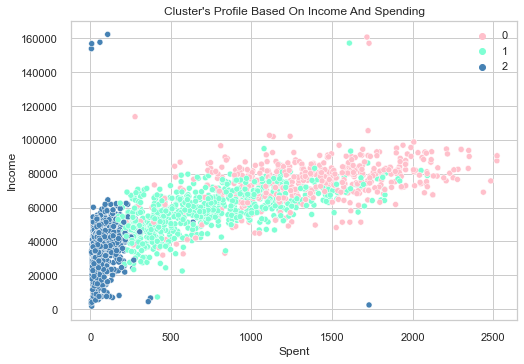

In [104]:
pl = sns.scatterplot(data=df,
                     x=df["Spent"], 
                     y=df["Income"],
                     hue=df["Clusters_KM"],
                     palette=["pink", "aquamarine","steelblue"]
                    )

pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

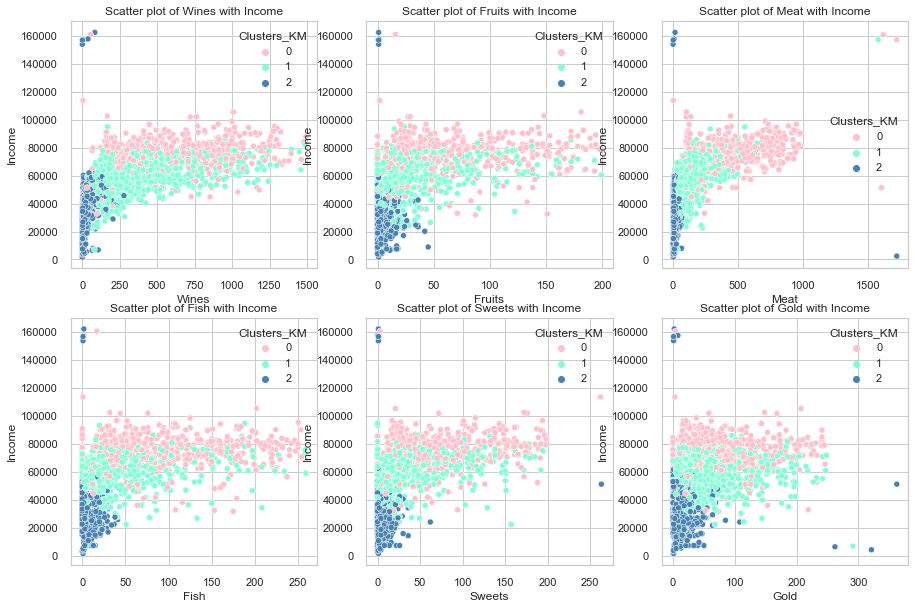

In [106]:
plt.figure(1, figsize= (15,10))
n=0
for x in ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold' ]:
    n+=1
    plt.subplot(2,3,n)
    sns.scatterplot(data = df, 
                    x =x, 
                    y='Income', 
                    hue = 'Clusters_KM', 
                    palette=["pink", "aquamarine","steelblue"])
    plt.title('Scatter plot of {} with Income'.format(x))
                 
plt.show()

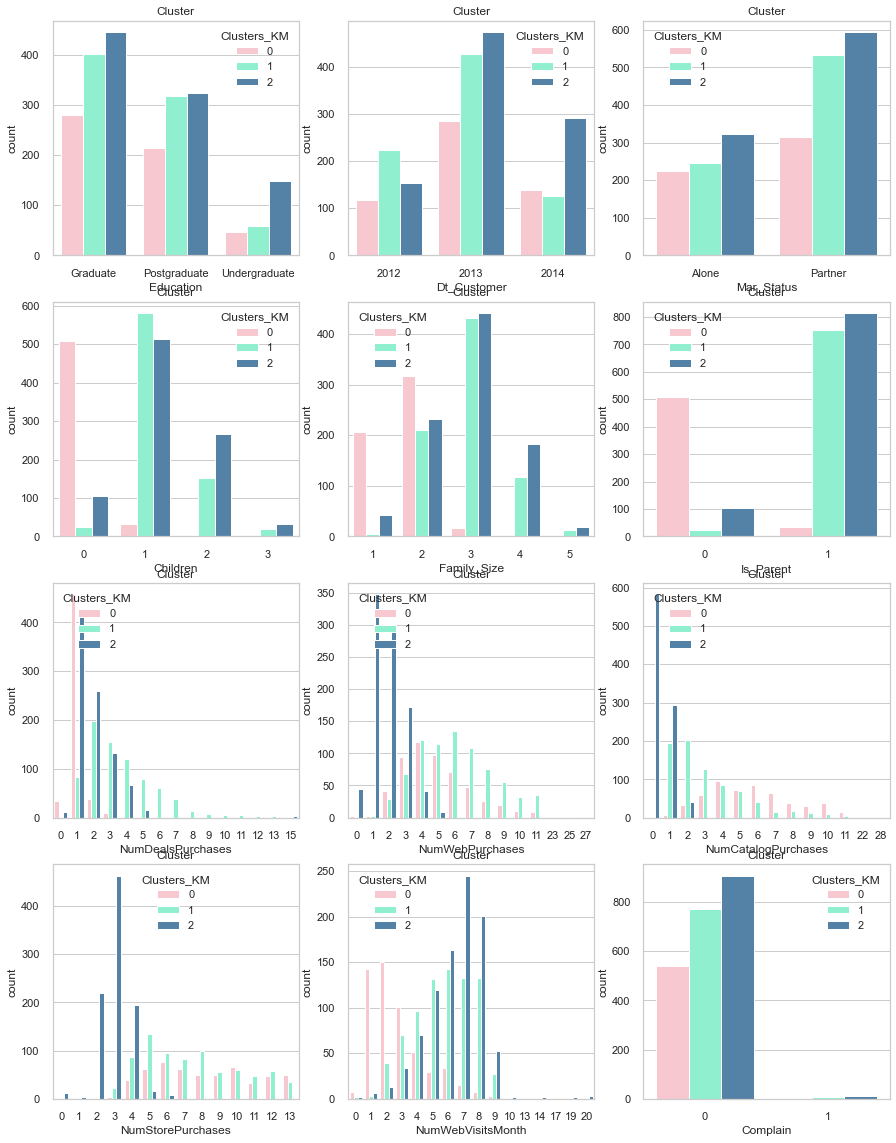

In [107]:
plt.figure(1, figsize= (15,25))
n=0
for x in ['Education', 'Dt_Customer',
       'Mar_Status', 'Children', 'Family_Size', 'Is_Parent',
         'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
          'NumWebVisitsMonth',  'Complain']:
    n+=1
    plt.subplot(5,3,n)
    sns.countplot(data=df,
                   x=x,
                   hue='Clusters_KM',
                   palette=["pink", "aquamarine","steelblue"])
        
    plt.title('Cluster'.format(x))
                 
plt.show()

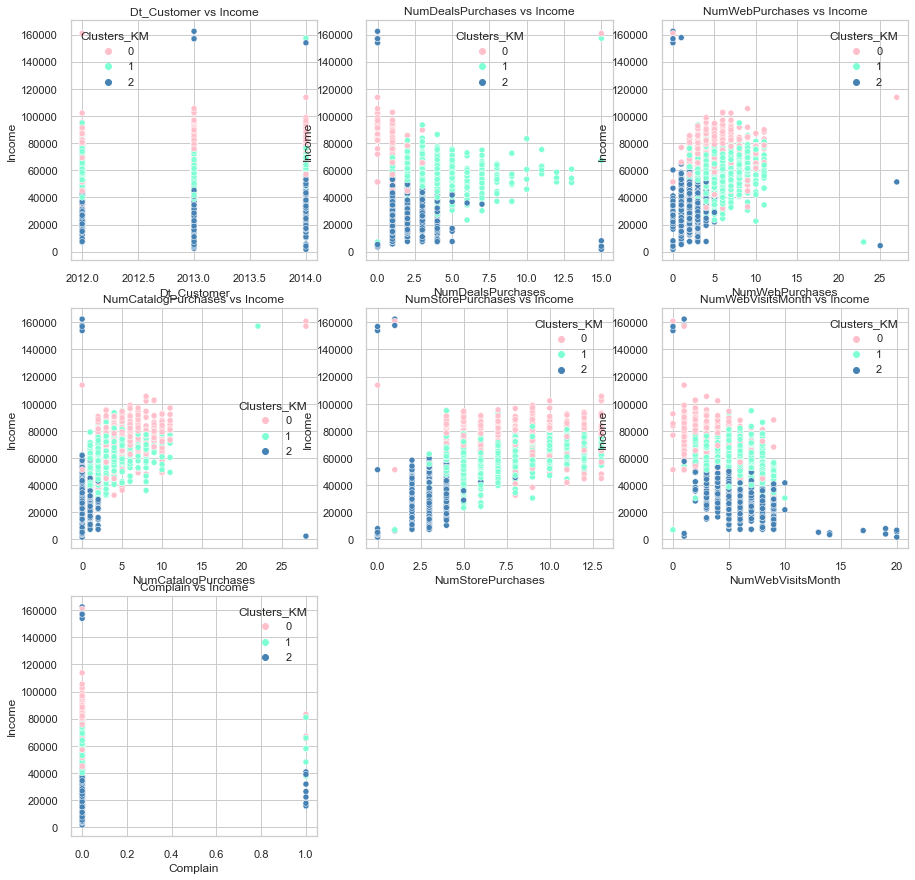

In [108]:
plt.figure(1, figsize= (15,15))
n=0
for x in ['Dt_Customer', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',  'Complain' ]:
    n+=1
    plt.subplot(3,3,n)
    sns.scatterplot(data = df, 
                    x =x, 
                    y='Income', 
                    hue = 'Clusters_KM', 
                    palette=["pink", "aquamarine","steelblue"])
    plt.title('{} vs Income'.format(x))
                 
plt.show()

## 5.3 Compare and getting a new clusterization from both methods

In [117]:
dft = df.groupby(['Clusters_AC','Clusters_KM']).agg({'Age':'count'}).reset_index()
dft

,Clusters_AC,Clusters_KM,Age
0,0,0,17
1,0,1,412
2,0,2,906
3,1,0,508
4,1,1,33
5,1,2,12
6,2,0,16
7,2,1,332


In [118]:
cluster1 = df.loc[(df['Clusters_AC'] ==0) & (df['Clusters_KM'] == (dft.iloc[dft.loc[(dft['Clusters_AC'] ==0)]['Age'].idxmax()][1]))]
cluster2 = df.loc[(df['Clusters_AC'] ==1) & (df['Clusters_KM'] == (dft.iloc[dft.loc[(dft['Clusters_AC'] ==1)]['Age'].idxmax()][1]))]
cluster3 = df.loc[(df['Clusters_AC'] ==2) & (df['Clusters_KM'] == (dft.iloc[dft.loc[(dft['Clusters_AC'] ==2)]['Age'].idxmax()][1]))]

In [119]:
cluster1

,Education,Income,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,Spent,Mar_Status,Children,Family_Size,Is_Parent,Clusters_KM,Clusters_AC,Cluster,Total_Promos,Num_Purchases
1,Graduate,46344.0,2014,38,11,1,6,2,1,6,...,27,Alone,2,3,1,2,0,Cluster 1,0,6
3,Graduate,26646.0,2014,26,11,4,20,10,3,5,...,53,Partner,1,3,1,2,0,Cluster 1,0,8
7,Postgraduate,33454.0,2013,32,76,10,56,3,1,23,...,169,Partner,1,3,1,2,0,Cluster 1,0,10
8,Postgraduate,30351.0,2013,19,14,0,24,3,3,2,...,46,Partner,1,3,1,2,0,Cluster 1,0,6
9,Postgraduate,5648.0,2014,68,28,0,6,1,1,13,...,49,Partner,2,4,1,2,0,Cluster 1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2223,Postgraduate,33562.0,2014,33,21,12,12,0,3,3,...,51,Partner,3,5,1,2,0,Cluster 1,0,9
2229,Graduate,24434.0,2014,9,3,2,8,20,0,17,...,50,Partner,2,4,1,2,0,Cluster 1,0,7
2230,Graduate,11012.0,2013,82,24,3,26,7,1,23,...,84,Alone,1,2,1,2,0,Cluster 1,1,9
2232,Graduate,26816.0,2012,50,5,1,6,3,4,3,...,22,Alone,0,1,0,2,0,Cluster 1,0,4


In [120]:
df["Cluster"] = "Other"
df.loc[(df['Clusters_AC'] ==0) & (df['Clusters_KM'] ==(dft.iloc[dft.loc[(dft['Clusters_AC'] ==0)]['Age'].idxmax()][1])),"Cluster"] = "Cluster 1"
df.loc[(df['Clusters_AC'] ==1) & (df['Clusters_KM'] ==(dft.iloc[dft.loc[(dft['Clusters_AC'] ==1)]['Age'].idxmax()][1])),"Cluster"] = "Cluster 2"
df.loc[(df['Clusters_AC'] ==2) & (df['Clusters_KM'] ==(dft.iloc[dft.loc[(dft['Clusters_AC'] ==2)]['Age'].idxmax()][1])),"Cluster"] = "Cluster 3"

In [121]:
df.Cluster.value_counts()

Cluster 1    906
Cluster 2    508
Other        490
Cluster 3    332
Name: Cluster, dtype: int64

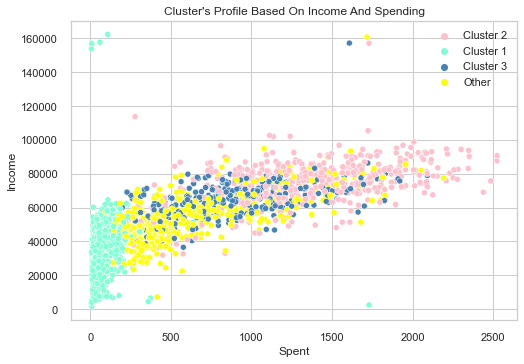

In [136]:
pl = sns.scatterplot(data=df,
                     x=df["Spent"], 
                     y=df["Income"],
                     hue=df["Cluster"],
                     palette=["pink", "aquamarine","steelblue","yellow"]
                    )

pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

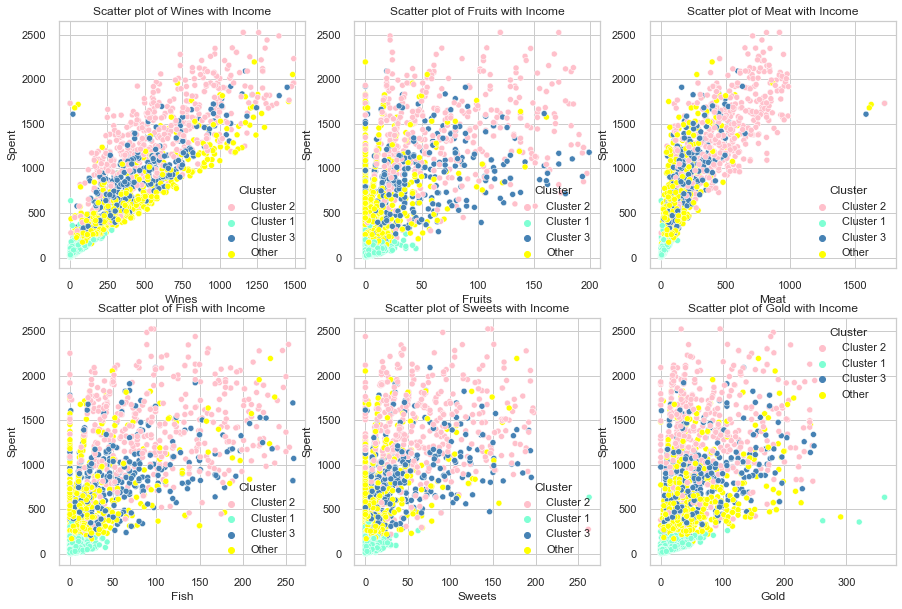

In [140]:
plt.figure(1, figsize= (15,10))
n=0
for x in ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold' ]:
    n+=1
    plt.subplot(2,3,n)
    sns.scatterplot(data = df, 
                    x =x, 
                    y='Spent', 
                    hue = 'Cluster', 
                    palette=["pink", "aquamarine","steelblue","yellow"])
    plt.title('Scatter plot of {} with Income'.format(x))
                 
plt.show()

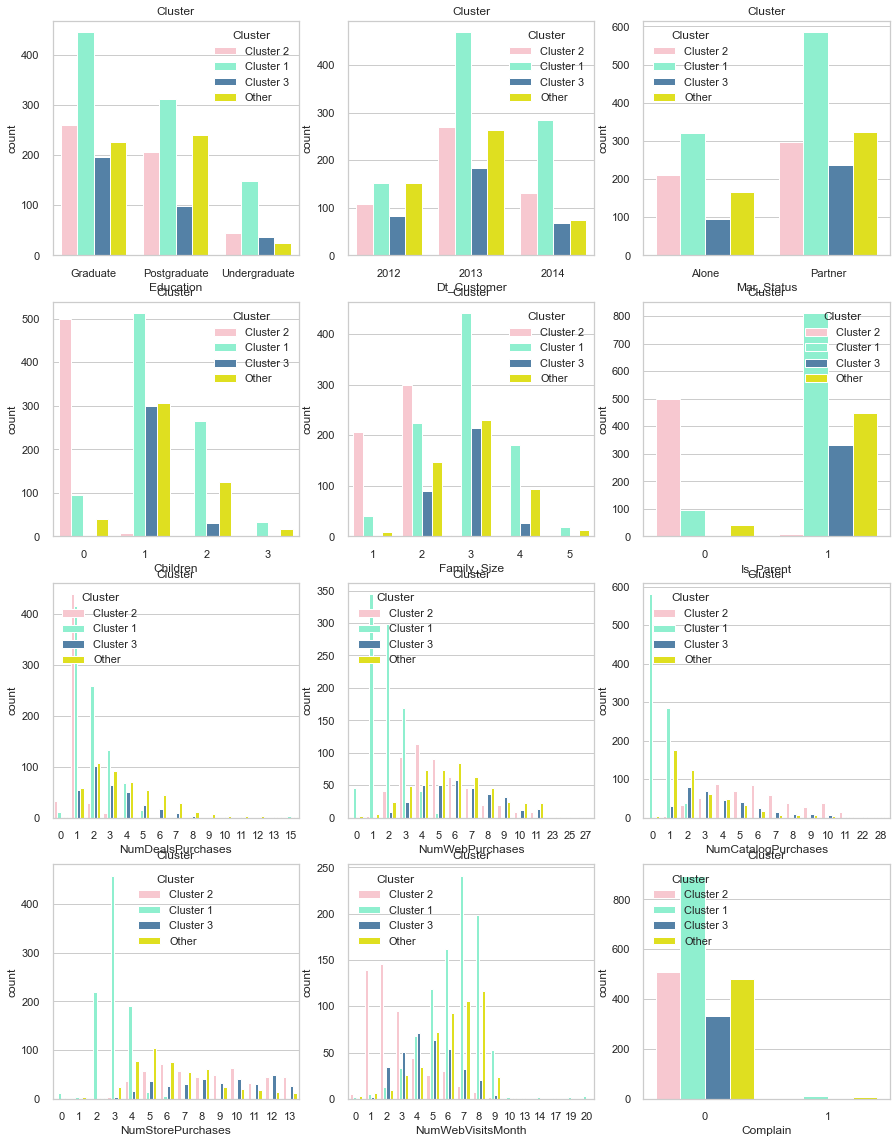

In [138]:
plt.figure(1, figsize= (15,25))
n=0
for x in ['Education', 'Dt_Customer',
       'Mar_Status', 'Children', 'Family_Size', 'Is_Parent',
         'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
          'NumWebVisitsMonth',  'Complain']:
    n+=1
    plt.subplot(5,3,n)
    sns.countplot(data=df,
                   x=x,
                   hue='Cluster',
                   palette=["pink", "aquamarine","steelblue","yellow"])
        
    plt.title('Cluster'.format(x))
                 
plt.show()

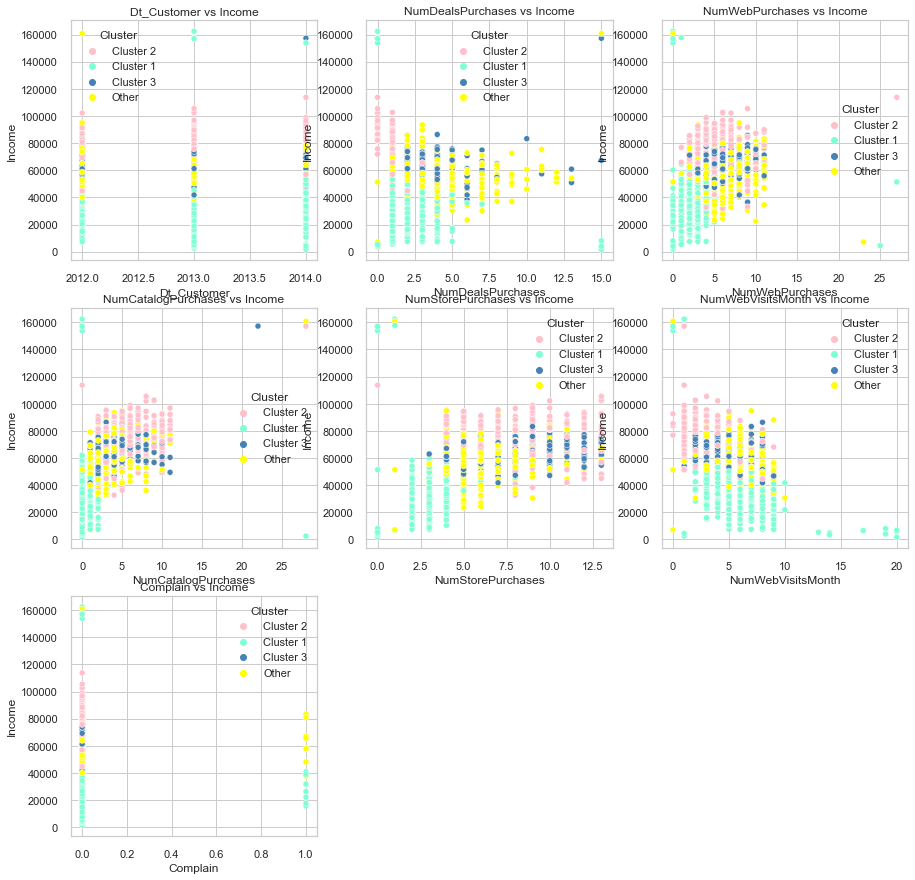

In [139]:
plt.figure(1, figsize= (15,15))
n=0
for x in ['Dt_Customer', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',  'Complain' ]:
    n+=1
    plt.subplot(3,3,n)
    sns.scatterplot(data = df, 
                    x =x, 
                    y='Income', 
                    hue = 'Cluster', 
                    palette=["pink", "aquamarine","steelblue","yellow"])
    plt.title('{} vs Income'.format(x))
                 
plt.show()

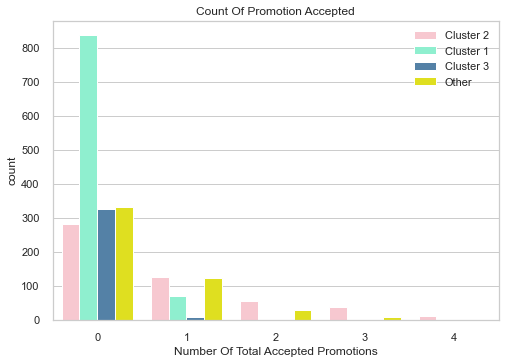

In [123]:
#Creating a feature to get a sum of accepted promotions 
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]

#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df["Total_Promos"],
                   hue=df["Cluster"],
                   palette=["pink", "aquamarine","steelblue","yellow"])

pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.legend(loc='upper right')
plt.show()

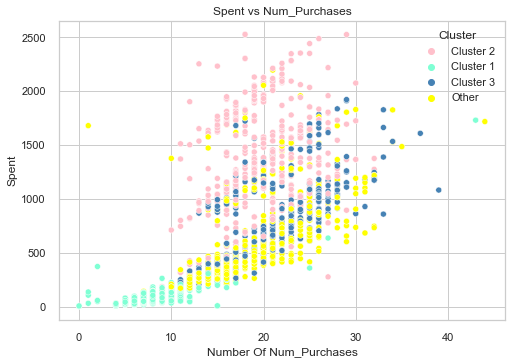

In [124]:
#Creating a feature to get a sum of number of purchases
df["Num_Purchases"] = df['NumDealsPurchases']+ df['NumWebPurchases']+ df['NumCatalogPurchases']+ df['NumStorePurchases']

#Plotting 
plt.figure()
pl = sns.scatterplot(
    data=df,
    x=df["Num_Purchases"],
    y=df["Spent"],
    hue=df["Cluster"],
    palette=["pink", "aquamarine","steelblue","yellow"])


pl.set_title("Spent vs Num_Purchases")
pl.set_ylabel("Spent")
pl.set_xlabel("Number Of Num_Purchases")
plt.show()

Text(0.5, 1.0, 'Swarm plot of age with Clusters')

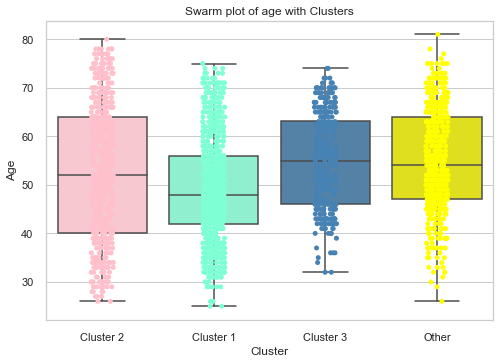

In [142]:
#Analyze Age of customers according to clusters

sns.stripplot(x='Cluster', y='Age', data=df,palette=["pink", "aquamarine","steelblue","yellow"])
sns.boxplot(x='Cluster', y='Age', data=df,palette=["pink", "aquamarine","steelblue","yellow"])
plt.title('Swarm plot of age with Clusters')

Text(0.5, 1.0, 'Swarm plot of Income with Clusters')

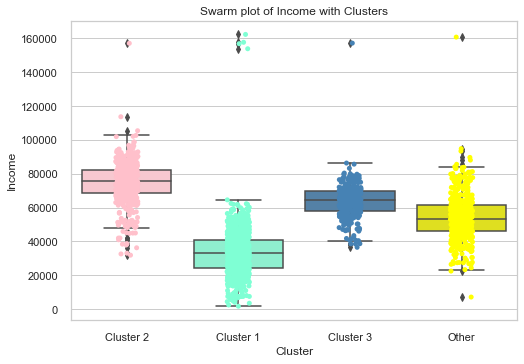

In [143]:
#Analyze income of customers according to clusters
sns.stripplot(x='Cluster', y='Income', data=df,palette=["pink", "aquamarine","steelblue","yellow"])
sns.boxplot(x='Cluster', y='Income', data=df,palette=["pink", "aquamarine","steelblue","yellow"])
plt.title('Swarm plot of Income with Clusters')

# Positioning the clusters and conclusions
From these results, it can be seen that the three clusters created have the following featuers.

Cluster	Behaviour
cluster 1	Higherst earners and spenders. Average age, and the cluster with the least number of children. Highest Number of Catalogue and Instore Purchases, while lowerst cluster to conduct web visits
cluster 2	Lowest age group among the clusters, and lowerst earners and spenders. Have more childeren compared to other clusters. Looks like regular shoppers as the days since last purchase day is low
cluster 3	Cluster with the olderst demography. Shows the heighst amount of deal users.